# Import Modules and Data

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.patches as mpatches
from labellines import labelLine, labelLines
import matplotlib.cm as cm

In [3]:
# Single epoch mass estimate using single gaussian broad line models for the emission lines.
path_24 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2024_Analysis/'
conti_results_1br_24 = pd.read_csv(path_24 + 'mcmc_conti_results_1_br_gauss.csv') # Continuum parameters
line_results_1br_24 = pd.read_csv(path_24 + 'mcmc_line_results_1_br_gauss.csv') # Individual line parameters
fur_results_1br_24 = pd.read_csv(path_24 + 'mcmc_fur_results_1_br_gauss.csv') # Combined line complex parameters

path_22 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2022_Analysis/'
conti_results_1br_22 = pd.read_csv(path_22 + 'mcmc_conti_results_1_br_gauss.csv') # Continuum parameters
line_results_1br_22 = pd.read_csv(path_22 + 'mcmc_line_results_1_br_gauss.csv') # Individual line parameters
fur_results_1br_22 = pd.read_csv(path_22 + 'mcmc_fur_results_1_br_gauss.csv') # Combined line complex parameters

path_04 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2009_Analysis/'
conti_results_1br_04 = pd.read_csv(path_04 + 'mcmc_conti_results_host_sub_1_br_gauss.csv')
line_results_1br_04 = pd.read_csv(path_04 + 'mcmc_line_results_host_sub_1_br_gauss.csv')
fur_results_1br_04 = pd.read_csv(path_04 + 'mcmc_fur_results_host_sub_1_br_gauss.csv')

# Rename the line_comp column in 2004
fur_results_1br_04 = fur_results_1br_04.rename(columns={'br_line': 'line_comp'})
conti_results_1br_22

,Unnamed: 0,ra,dec,plateid,MJD,fiberid,redshift,SN_ratio_conti,Fe_uv_norm,Fe_uv_norm_err,...,qso_par_0,qso_par_1,qso_par_2,qso_par_3,qso_par_4,qso_par_5,qso_par_6,qso_par_7,qso_par_8,qso_par_9
0,0,41.43958,-3.08047,0,0,0,0.07455,89.318227,0.0,0.0,...,2913.023615,1647.195152,230.470746,14005.595651,3390.981245,-2316.707725,182.880097,35.859008,1636.144947,1407.754992


# Import and Create Combined Parameter Dataframes

In [4]:
# Function that combines the line parameters of Ha and Hb from 3 epochs into a single df
def importLineParameters(fur_results_04, fur_results_22, fur_results_24):
    # Take imported dataframes and reduce down to line_comp, fwhm, area w/ errors
    reduced_df_04 = fur_results_04.loc[fur_results_04['line_comp'].isin(['Hb', 'Ha']), ['line_comp', 'fwhm', 'fwhm_err', 'area', 'area_err']]
    reduced_df_22 = fur_results_22.loc[fur_results_22['line_comp'].isin(['Hb', 'Ha']), ['line_comp', 'fwhm', 'fwhm_err', 'area', 'area_err']]
    reduced_df_24 = fur_results_24.loc[fur_results_24['line_comp'].isin(['Hb', 'Ha']), ['line_comp', 'fwhm', 'fwhm_err', 'area', 'area_err']]
    
    # Add a year column to denote the separate epoch data
    reduced_df_04.insert(0, 'year', [2004, 2004])
    reduced_df_22.insert(0, 'year', [2022, 2022])
    reduced_df_24.insert(0, 'year', [2024, 2024])
    
    # Combine the dataframe rows for the line parameters
    combined_df = pd.concat([reduced_df_04, reduced_df_22, reduced_df_24], ignore_index=True)
    return combined_df


# Function that combines the conti parameters of L5100 flux from 3 epochs in a single df
def importContiParameters(conti_results_04, conti_results_22, conti_results_24):
    # Take continuum flux columns from original large df
    reduced_df_04 = conti_results_04[['L5100', 'L5100_err']]
    reduced_df_22 = conti_results_22[['L5100', 'L5100_err']]
    reduced_df_24 = conti_results_24[['L5100', 'L5100_err']]
    
    # Add a year column to denote the separate epoch data
    reduced_df_04.insert(0, 'year', 2004)
    reduced_df_22.insert(0, 'year', 2022)
    reduced_df_24.insert(0, 'year', 2024)
    
    # Combine the dataframes
    combined_df = pd.concat([reduced_df_04, reduced_df_22, reduced_df_24], ignore_index=True)
    return combined_df


# Create dataframes with line and conti parameters
line_params = importLineParameters(fur_results_1br_04, fur_results_1br_22, fur_results_1br_24)
conti_params = importContiParameters(conti_results_1br_04, conti_results_1br_22, conti_results_1br_24)

# Merge line and conti parameters matching the years
parameters_df = pd.merge(line_params, conti_params, on='year', how='left')
parameters_df

,year,line_comp,fwhm,fwhm_err,area,area_err,L5100,L5100_err
0,2004,Hb,7332.804314,424.319498,1252.222585,98.153442,41.934072,0.107111
1,2004,Ha,5146.579932,225.120007,1090.910669,32.919528,41.934072,0.107111
2,2022,Hb,5055.909447,231.206606,2439.798871,95.076524,42.762679,0.018098
3,2022,Ha,4449.927552,71.890732,4897.775213,104.744748,42.762679,0.018098
4,2024,Hb,4821.664202,3355.622604,7152.686669,243.214382,43.402277,0.011273
5,2024,Ha,4405.784370,78.136525,10798.523816,209.976051,43.402277,0.011273


# Calculate Luminosity from Flux

Assuming flat universe, H0 = 70 km/s/Mpc and Omega_M = 0.3

In [5]:
# Convert flux to luminosity
z = 0.07455
cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter

luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
luminosity_distance_cm  = luminosity_distance.value

# Get fluxes from parameter input
flux = parameters_df['area'].to_numpy()
flux_err = parameters_df['area_err'].to_numpy()

# Calculate luminosity from fluxes
luminosity = ((flux*10**-17) * 4 * np.pi * luminosity_distance_cm**2)
luminosity_err = ((flux_err*10**-17) * 4 * np.pi * luminosity_distance_cm**2)

# Insert luminosities back into parameter df next to the flux columns
parameters_df.insert(parameters_df.columns.get_loc('area_err') + 1, 'L', luminosity)
parameters_df.insert(parameters_df.columns.get_loc('L') + 1, 'L_err', luminosity_err)
parameters_df

,year,line_comp,fwhm,fwhm_err,area,area_err,L,L_err,L5100,L5100_err
0,2004,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111
1,2004,Ha,5146.579932,225.120007,1090.910669,32.919528,1.484508e+41,4.479680e+39,41.934072,0.107111
2,2022,Hb,5055.909447,231.206606,2439.798871,95.076524,3.320071e+41,1.293799e+40,42.762679,0.018098
3,2022,Ha,4449.927552,71.890732,4897.775213,104.744748,6.664878e+41,1.425363e+40,42.762679,0.018098
4,2024,Hb,4821.664202,3355.622604,7152.686669,243.214382,9.733355e+41,3.309654e+40,43.402277,0.011273
5,2024,Ha,4405.784370,78.136525,10798.523816,209.976051,1.469460e+42,2.857348e+40,43.402277,0.011273


## L5100 from LHa (TEST)

Seen used in Lu et al. 2024 cited from Greene & Ho 2005 (L500) and McLure & Dunlop 2004 (Lbol)

In [6]:
def conti_luminosity(LHa):
    return 2.39e43 * (LHa / 10**42)**0.86

def bol_luminosity(L5100):
    return 9.8*L5100

Ha_luminosities = np.array([1.484508e+41, 6.664878e+41, 1.469460e+42])
print(Ha_luminosities)
print(conti_luminosity(Ha_luminosities))
print(np.log10(Ha_luminosities))

#SMBH mass: 4.57e+07 M_sun
#Eddington luminosity: 5.756e+45 M_sun

print(bol_luminosity(conti_luminosity(Ha_luminosities)) / 5.756e+45)

[1.484508e+41 6.664878e+41 1.469460e+42]
[4.6340304945434876e+42 1.6860063131236555e+43 3.3277721438239914e+43]
[41.17158254 41.8237922  42.16715777]
[0.007889766999049024 0.028705458423578568 0.05665769112139527]


## Recreate Errors TEST

Using Mrk 335 data from Vestergaard & Peterson 2006

In [7]:
fwhm_mrk335 = 1841
logL5100_mrk335 = 43.71
logL5100_mrk335_err = 0.011
logLHB_mrk335 = [41.95, 0.043]

def VP065100(fwhm, lum):
    return (np.log10( (fwhm/1000)**2 * (lum - 44)**0.5 ) + 6.91)

print(VP065100(fwhm_mrk335, logL5100_mrk335))
print('Expected Values:')
print('log M_BH,5100 = 7.192   +0.081   -0.099')
print('log M_BH,HB = 7.175   +0.083   -0.102')

(7.171306575957507+0.6821881769209206j)
Expected Values:
log M_BH,5100 = 7.192   +0.081   -0.099
log M_BH,HB = 7.175   +0.083   -0.102


# Create Model Dependent Parameter Dataframe

M_BH = a * (L/10^b)^c * (FWHM/10^d)^e

All models can be reduced to this equation so depending on the model, it will have it's own unique values of a, b, c, d, e

In [8]:
logf = 0.683

models_array = np.array([
    # Model                 A           B       C       D       E
    ['KaspiHb',             2.4e6,      42,     0.59,   3,      2       ],
    ['KaspiHa',             1.3e6,      42,     0.57,   3,      2.06    ], # 2005
    ['GreeneHb',            3.6e6,      42,     0.56,   3,      2       ],
    ['GreeneHa',            2e6,        42,     0.55,   3,      2.06    ], # 2005
    ['BontaHb',             10**7.70,   42,     0.784,  3.5,    1.387   ], # 2020
    ['BontaHa',             10**7.37,   42,     0.812,  3.5,    1.387   ], # 2024
    ['LaMassaHbL5100',      10**0.85,   44,     0.5,    0,      2       ],
    ['LaMassaHaL5100',      10**0.807,  44,     0.519,  0,      2.06    ], # 2024
    ['VestergaardHb',       10**6.91,   44,     0.5,    3,      2       ],
    ['VestergaardHbL5100',  10**6.67,   42,     0.63,   3,      2       ], # 2006
    #['FengHbL5100',         10**3.602,  44,     0.504,  0,      1.2     ], # 2014
])
models_df = pd.DataFrame(models_array, columns=['model', 'a', 'b', 'c', 'd', 'e'])
# Convert all columns except 'Model' to float
for col in models_df.columns[1:]:  # Skip the first column ('Model')
    models_df[col] = models_df[col].astype(float)
models_df

,model,a,b,c,d,e
0,KaspiHb,2.400000e+06,42.0,0.590,3.0,2.000
1,KaspiHa,1.300000e+06,42.0,0.570,3.0,2.060
2,GreeneHb,3.600000e+06,42.0,0.560,3.0,2.000
3,GreeneHa,2.000000e+06,42.0,0.550,3.0,2.060
4,BontaHb,5.011872e+07,42.0,0.784,3.5,1.387
5,BontaHa,2.344229e+07,42.0,0.812,3.5,1.387
6,LaMassaHbL5100,7.079458e+00,44.0,0.500,0.0,2.000
7,LaMassaHaL5100,6.412096e+00,44.0,0.519,0.0,2.060
8,VestergaardHb,8.128305e+06,44.0,0.500,3.0,2.000
9,VestergaardHbL5100,4.677351e+06,42.0,0.630,3.0,2.000


In [9]:
# Create model array to use with logM equation instead of M
log_models_array = np.array([
    # Model                 A               B       C       D       E
    ['KaspiHb',             6.38021124,     42,     0.59,   3,      2       ],
    ['KaspiHa',             6.11394335,     42,     0.57,   3,      2.06    ], # 2005
    ['GreeneHb',            6.5563025,      42,     0.56,   3,      2       ],
    ['GreeneHa',            6.30103,        42,     0.55,   3,      2.06    ], # 2005
    ['BontaHb',             7.70,           42,     0.784,  3.5,    1.387   ], # 2020
    ['BontaHa',             7.37,           42,     0.812,  3.5,    1.634   ], # 2024
    ['LaMassaHbL5100',      0.85,           44,     0.5,    0,      2       ],
    ['LaMassaHaL5100',      0.807,          44,     0.519,  0,      2.06    ], # 2024
    ['VestergaardHbL5100',  6.91,           44,     0.5,    3,      2       ],
    ['VestergaardHb',       6.67,           42,     0.63,   3,      2       ], # 2006
])
log_models_df = pd.DataFrame(log_models_array, columns=['model', 'a', 'b', 'c', 'd', 'e'])
# Convert all columns except 'Model' to float
for col in log_models_df.columns[1:]:  # Skip the first column ('Model')
    log_models_df[col] = log_models_df[col].astype(float)
log_models_df

,model,a,b,c,d,e
0,KaspiHb,6.380211,42.0,0.590,3.0,2.000
1,KaspiHa,6.113943,42.0,0.570,3.0,2.060
2,GreeneHb,6.556303,42.0,0.560,3.0,2.000
3,GreeneHa,6.301030,42.0,0.550,3.0,2.060
4,BontaHb,7.700000,42.0,0.784,3.5,1.387
5,BontaHa,7.370000,42.0,0.812,3.5,1.634
6,LaMassaHbL5100,0.850000,44.0,0.500,0.0,2.000
7,LaMassaHaL5100,0.807000,44.0,0.519,0.0,2.060
8,VestergaardHbL5100,6.910000,44.0,0.500,3.0,2.000
9,VestergaardHb,6.670000,42.0,0.630,3.0,2.000


# Calculate BH Mass

In [10]:
# General BH mass equation - this is equivalent to Bonta and LaMassa but may need to add those separately
def generalMassCalculation(fit_params, model_params, epoch, model, line):
    
    a, b, c, d, e = model_params.loc[model_params['model'] == model, ['a', 'b', 'c', 'd', 'e']].values[0].astype(float)
    
    # Check whether the luminosity L we will be using is from the line (L) or continuum (L5100), used in LaMassa
    if model.startswith('LaMassa') or model.startswith('Vestergaard'):
        # Get line width and luminosity from dataframe
        #fwhm, fwhm_err, L, L_err = fit_params.loc[(fit_params['year'] == epoch) & (fit_params['line_comp'] == line), ['fwhm', 'fwhm_err', 'L5100', 'L5100_err']]
        fwhm, fwhm_err, L, L_err = fit_params.loc[(fit_params['year'] == epoch) & (fit_params['line_comp'] == line),['fwhm', 'fwhm_err', 'L5100', 'L5100_err']].values[0]
        L = 10**L
    else:
        fwhm, fwhm_err, L, L_err = fit_params.loc[(fit_params['year'] == epoch) & (fit_params['line_comp'] == line), ['fwhm', 'fwhm_err', 'L', 'L_err']].values[0]
    
    # Calculate the mass estimate
    print(a,b,c,d,e,fwhm, fwhm_err, L, L_err)
    print(type(d))
    print(d)
    10**d
    M = a * (L/10**b)**c * (fwhm/10**d)**e
    return M

# Create Mass Dataframe

In [11]:
# create dataframe to hold all the mass estimates in
estimates_df = parameters_df.loc[parameters_df.index.repeat(5)].reset_index(drop=True) # caveat being this creates 5 models for Ha and Hb but Vestergaard only applies to Hb (twice) so go back through and set line_comp to be Hb for both Vestergaard models.


# Create and insert column of models used duplicated 3 times for each epoch
model_list = np.array(['KaspiHb', 'GreeneHb', 'BontaHb', 'LaMassaHbL5100', 'VestergaardHbL5100', 'VestergaardHb', 'KaspiHa', 'GreeneHa', 'BontaHa', 'LaMassaHaL5100'])
duplicated_model_list = np.tile(model_list, 3)
estimates_df.insert(1, 'model', duplicated_model_list)

# FIXES CAVEAT ABOVE Check if 'model' starts with 'VestergaardHb' and duplicate the cell info from above (To swap HA info to HB)
# Identify rows where 'model' starts with 'Vestergaard'
mask = estimates_df['model'].str.startswith('VestergaardHb')
# Copy the row above, but keep the 'model' column unchanged
estimates_df.loc[mask, estimates_df.columns != 'model'] = estimates_df.shift(1).loc[mask, estimates_df.columns != 'model']

# Loop through rows to calculate masses
masses = []
for index,row in estimates_df.iterrows():
    #print(row)
    mass = generalMassCalculation(parameters_df, models_df, row['year'], row['model'], row['line_comp'])
    masses.append(mass)

estimates_df['bh_mass'] = masses

2400000.0 42.0 0.59 3.0 2.0 7332.804313996017 424.3194982043355 1.7040208459083708e+41 1.3356691831050663e+40
<class 'numpy.float64'>
3.0
3600000.0 42.0 0.56 3.0 2.0 7332.804313996017 424.3194982043355 1.7040208459083708e+41 1.3356691831050663e+40
<class 'numpy.float64'>
3.0
50118723.36272725 42.0 0.784 3.5 1.387 7332.804313996017 424.3194982043355 1.7040208459083708e+41 1.3356691831050663e+40
<class 'numpy.float64'>
3.5
7.079457843841379 44.0 0.5 0.0 2.0 7332.804313996017 424.3194982043355 8.591560244601408e+41 0.1071106188153692
<class 'numpy.float64'>
0.0
4677351.412871981 42.0 0.63 3.0 2.0 7332.804313996017 424.3194982043355 8.591560244601408e+41 0.1071106188153692
<class 'numpy.float64'>
3.0
8128305.161640995 44.0 0.5 3.0 2.0 7332.804313996017 424.3194982043355 8.591560244601408e+41 0.1071106188153692
<class 'numpy.float64'>
3.0
1300000.0 42.0 0.57 3.0 2.06 5146.579931998067 225.12000654465555 1.484508060660112e+41 4.4796797795918264e+39
<class 'numpy.float64'>
3.0
2000000.0 42.0 

In [12]:
estimates_df

,year,model,line_comp,fwhm,fwhm_err,area,area_err,L,L_err,L5100,L5100_err,bh_mass
0,2004,KaspiHb,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111,4.542779e+07
1,2004,GreeneHb,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111,7.185693e+07
2,2004,BontaHb,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111,4.018888e+07
3,2004,LaMassaHbL5100,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111,3.528387e+07
4,2004,VestergaardHbL5100,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111,2.285628e+08
5,2004,VestergaardHb,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111,4.051130e+07
6,2004,KaspiHa,Ha,5146.579932,225.120007,1090.910669,32.919528,1.484508e+41,4.479680e+39,41.934072,0.107111,1.280778e+07
7,2004,GreeneHa,Ha,5146.579932,225.120007,1090.910669,32.919528,1.484508e+41,4.479680e+39,41.934072,0.107111,2.047052e+07
8,2004,BontaHa,Ha,5146.579932,225.120007,1090.910669,32.919528,1.484508e+41,4.479680e+39,41.934072,0.107111,9.788170e+06
9,2004,LaMassaHaL5100,Ha,5146.579932,225.120007,1090.910669,32.919528,1.484508e+41,4.479680e+39,41.934072,0.107111,2.401662e+07


In [13]:
estimates_df.loc[estimates_df['model']=='VestergaardHb', 'fwhm'].values

array([7332.804314  , 5055.90944669, 4821.66420224])

In [14]:
# Test Feng+14 alternative approach using L1, L2
feng_luminosity = np.array([5.838558889677987e+26, 1.3438166964657508e+26, 9.401228488717022e+26, 1.9257206549987714e+26, 9.00999727720613e+26, 2.2285959050341013e+26])

for i in [0, 2, 4]:
    print(np.log10( (feng_luminosity[i])**9.89 * (feng_luminosity[i+1])**-9.33 ) - 21.55)

-0.6086494786231782
-0.02045960996479934
-0.7949054071478514


# Plot Mass Relations

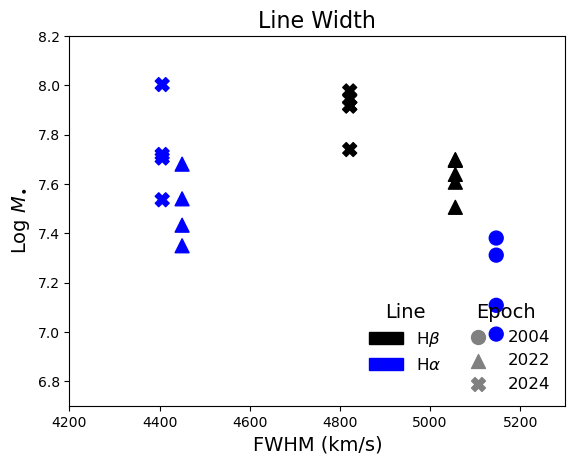

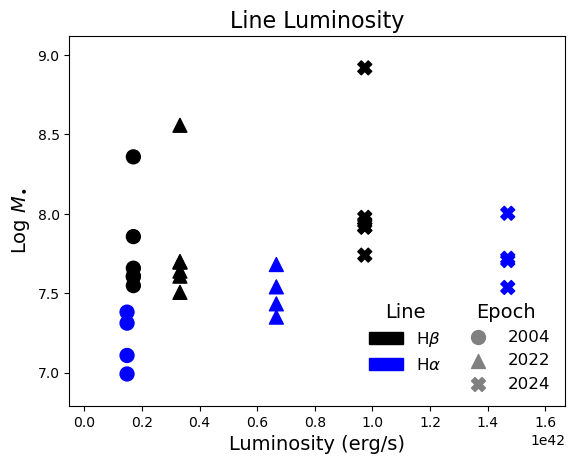

In [15]:
colors_04 = estimates_df.loc[estimates_df['year']==2004, 'line_comp'].map({'Hb': 'black', 'Ha': 'blue'}).tolist()
colors_22 = estimates_df.loc[estimates_df['year']==2022, 'line_comp'].map({'Hb': 'black', 'Ha': 'blue'}).tolist()
colors_24 = estimates_df.loc[estimates_df['year']==2024, 'line_comp'].map({'Hb': 'black', 'Ha': 'blue'}).tolist()

# Line Width Plot
plt.scatter(estimates_df.loc[estimates_df['year']==2004, 'fwhm'], np.log10(estimates_df.loc[estimates_df['year']==2004, 'bh_mass']), linestyle='None', marker='o', s=100, color=colors_04)
plt.scatter(estimates_df.loc[estimates_df['year']==2022, 'fwhm'], np.log10(estimates_df.loc[estimates_df['year']==2022, 'bh_mass']), linestyle='None', marker='^', s=100, color=colors_22)
plt.scatter(estimates_df.loc[estimates_df['year']==2024, 'fwhm'], np.log10(estimates_df.loc[estimates_df['year']==2024, 'bh_mass']), linestyle='None', marker='X', s=100, color=colors_24)
# Set x and ylim to be just beyond min and max
#plt.ylim(min(np.log10(estimates_df['bh_mass']))-0.2, max(np.log10(estimates_df['bh_mass']))+0.2)
plt.ylim(6.7, 8.2)
#plt.xlim(min(estimates_df['fwhm'])-300, max(estimates_df['fwhm'])+300)
plt.xlim(4200, 5300)

plt.title('Line Width', fontsize=16)
plt.xlabel('FWHM (km/s)', fontsize=14)
plt.ylabel(r"Log $M_{\bullet}$", fontsize=14)
#plt.legend(loc='lower right', fontsize=12)

# Custom Legend's
# First legend for color grouping Ha and Hb lines
black_patch = mpatches.Patch(color='black', label=r"H$\beta$") # Empty patch for marker colour
blue_patch = mpatches.Patch(color='blue', label=r"H$\alpha$")
legend1 = plt.legend(handles=[black_patch, blue_patch], loc='upper right', bbox_to_anchor=(0.78, 0.32), title="Line", fontsize=12, title_fontsize=14, frameon=False)
# Add the first legend to the plot
plt.gca().add_artist(legend1)
# Second legend for marker shape showing epoch
plt.scatter([], [], color='grey', s=100, marker='o',label='2004')  # Empty scatter for marker type
plt.scatter([], [], color='grey', s=100, marker='^',label='2022')
plt.scatter([], [], color='grey', s=100, marker='X',label='2024')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.32), title="Epoch", fontsize=12, title_fontsize=14, frameon=False)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "BHMassFWHMComparison.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()




# Line Luminosity Plot
plt.scatter(estimates_df.loc[estimates_df['year']==2004, 'L'], np.log10(estimates_df.loc[estimates_df['year']==2004, 'bh_mass']), linestyle='None', marker='o', s=100, color=colors_04)
plt.scatter(estimates_df.loc[estimates_df['year']==2022, 'L'], np.log10(estimates_df.loc[estimates_df['year']==2022, 'bh_mass']), linestyle='None', marker='^', s=100, color=colors_22)
plt.scatter(estimates_df.loc[estimates_df['year']==2024, 'L'], np.log10(estimates_df.loc[estimates_df['year']==2024, 'bh_mass']), linestyle='None', marker='X', s=100, color=colors_24)
# Set x and ylim to be just beyond min and max
plt.ylim(min(np.log10(estimates_df['bh_mass']))-0.2, max(np.log10(estimates_df['bh_mass']))+0.2)
#plt.ylim(6.8, 8.4)
plt.xlim(min(estimates_df['L'])-2e41, max(estimates_df['L'])+2e41)
plt.title('Line Luminosity', fontsize=16)
plt.xlabel('Luminosity (erg/s)', fontsize=14)
plt.ylabel(r"Log $M_{\bullet}$", fontsize=14)

# Custom Legend's
# First legend for color grouping Ha and Hb lines
black_patch = mpatches.Patch(color='black', label=r"H$\beta$") # Empty patch for marker colour
blue_patch = mpatches.Patch(color='blue', label=r"H$\alpha$")
legend1 = plt.legend(handles=[black_patch, blue_patch], loc='upper right', bbox_to_anchor=(0.78, 0.32), title="Line", fontsize=12, title_fontsize=14, frameon=False)
# Add the first legend to the plot
plt.gca().add_artist(legend1)
# Second legend for marker shape showing epoch
plt.scatter([], [], color='grey', s=100, marker='o',label='2004')  # Empty scatter for marker type
plt.scatter([], [], color='grey', s=100, marker='^',label='2022')
plt.scatter([], [], color='grey', s=100, marker='X',label='2024')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.32), title="Epoch", fontsize=12, title_fontsize=14, frameon=False)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "BHMassLuminosityComparison.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

## Plot Line Property Relations

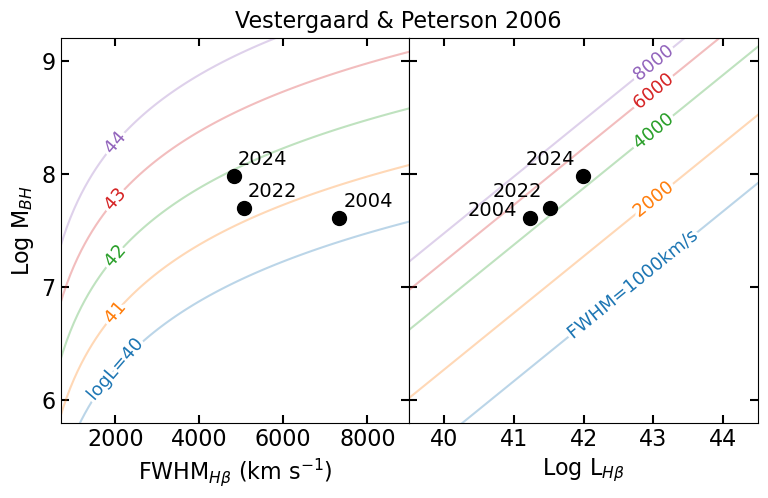

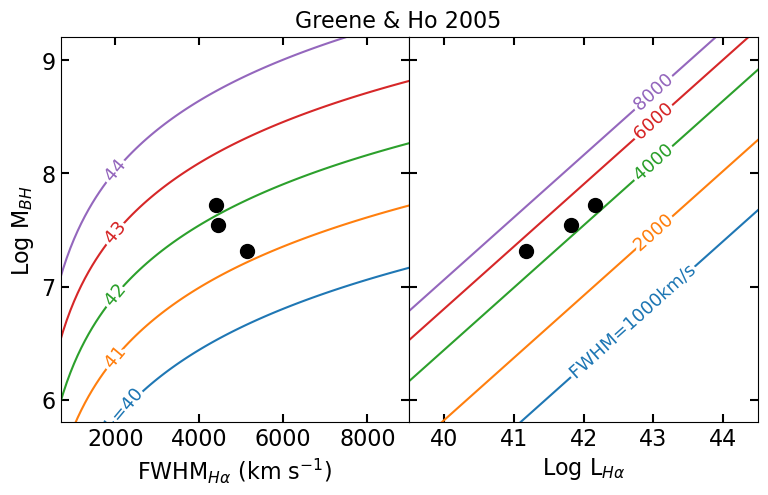

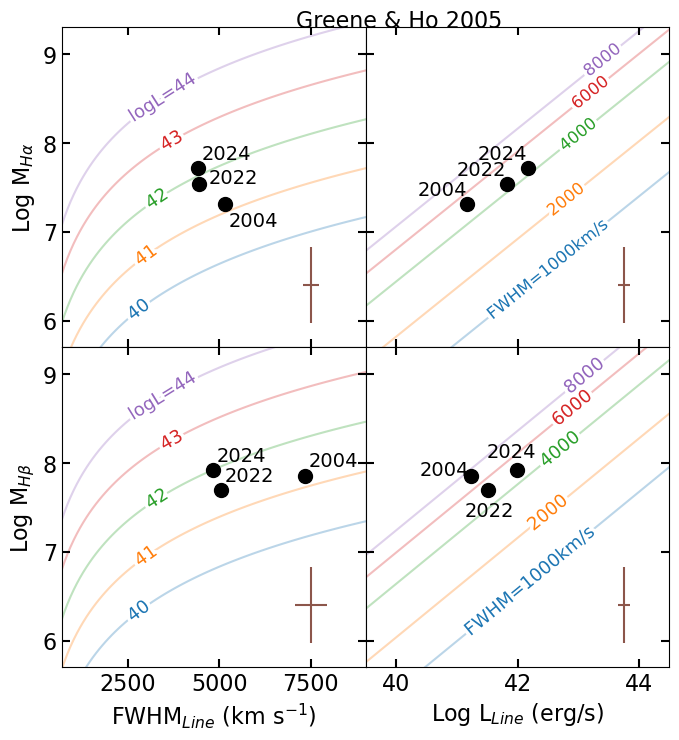

In [16]:
# Vestergaard & Peterson 2006 HB model
def VP06(Lum, Wid):
    a = 6.67
    b = 42
    c = 0.5
    d = 3
    e = 2
    return a + np.log10((Lum)**c * (Wid/10**d)**e)

# Same as above but takes logL
def VP06_logL(logLum, Wid):
    a = 6.67
    b = 42
    c = 0.5
    d = 3
    e = 2
    return a + c*(logLum - b) + np.log10((Wid/10**d)**e)

# Greene & Ho 2005 Ha Model taking logL
def G05_Ha(logLum, Wid):
    a = 6.301
    b = 42
    c = 0.55
    d = 3
    e = 2.06
    return a + c*(logLum - b) + np.log10((Wid/10**d)**e)

# Greene & Ho 2005 Hb Model taking logL
def G05_Hb(logLum, Wid):
    a = 6.556
    b = 42
    c = 0.56
    d = 3
    e = 2
    return a + c*(logLum - b) + np.log10((Wid/10**d)**e)

# Bonta 2024 Ha Model (default takes logL)
def B24_Ha(logLum, Wid):
    a = 7.37
    b = 42
    c = 0.812
    d = 3.5
    e = 1.634
    return a + c*(logLum - b) + e*(np.log10(Wid) - d)

# Bonta 2020 Hb Model (default takes logL)
def B20_Hb(logLum, Wid):
    a = 7.37
    b = 42
    c = 0.812
    d = 3.5
    e = 1.387
    return a + c*(logLum - b) + e*(np.log10(Wid) - d)



# Make plot for Vestergaard and Peterson Model
fig, ax = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
plt.subplots_adjust(wspace=0)  # Adjust the width space between subplots
#plt.figure(tight_layout=True)
fig.text(0.5, 0.90, r"Vestergaard & Peterson 2006", ha='center', fontsize=16)  # Shared title

# M vs FWHM
logL_arr = np.linspace(40, 44, 5) # varying L values to plot over
W = np.linspace(500, 9100, 100) # W for x-axis variable
for logL in logL_arr: # plot lines of constant logL
    M = VP06_logL(logL, W)
    if logL == 40:
        ax[0].plot(W, M, label=f'logL={int(logL)}', alpha=0.3)
    else:
        ax[0].plot(W, M, label=f'{int(logL)}', alpha=0.3)
labelLines(ax[0].get_lines(), fontsize=13, zorder=2.5, xvals=[2000, 2000, 2000, 2000, 2000])

# Plot mass estimate
ax[0].plot(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

ax[0].set_xlabel(r'FWHM$_{H \beta }$ (km s$^{-1}$)', fontsize=16) # Axis
ax[0].set_ylabel(r'Log M$_{BH}$', fontsize=16)
ax[0].set_yticks((6,7,8,9))
ax[0].set_ylim(5.8, 9.2)
ax[0].set_xlim(700, 9000)


# M vs Lumniosity
W_arr = np.array([1000, 2000, 4000, 6000, 8000])
logL = np.linspace(39, 45, 100)
for W in W_arr: # Plot lines of constant FWHM
    M = VP06_logL(logL, W)
    if W == 1000:
        ax[1].plot(logL, M, label=f'FWHM={int(W)}km/s', alpha=0.3)
    else:
        ax[1].plot(logL, M, label=f'{int(W)}', alpha=0.3)
labelLines(ax[1].get_lines(), fontsize=13, zorder=2.5, xvals=[42.7, 43, 43, 43, 43])

# Plot mass estimate
ax[1].plot(np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'L']), np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

ax[1].set_xlabel(r'Log L$_{H \beta }$', fontsize=16) # Axis
ax[1].set_xlim(39.5, 44.5)

# Custom marker labels
ax[0].text(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'fwhm'].values[0] + 100, np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']).values[0] + 0.1, '2004', fontsize=14)
ax[0].text(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'fwhm'].values[1] + 100, np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']).values[1] + 0.1, '2022', fontsize=14)
ax[0].text(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'fwhm'].values[2] + 100, np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']).values[2] + 0.1, '2024', fontsize=14)
ax[1].text(np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'L']).values[0] - 0.9, np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']).values[0] + 0.02, '2004', fontsize=14)
ax[1].text(np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'L']).values[1] - 0.82, np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']).values[1] + 0.1, '2022', fontsize=14)
ax[1].text(np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'L']).values[2] - 0.82, np.log10(estimates_df.loc[estimates_df['model']=='VestergaardHb', 'bh_mass']).values[2] + 0.1, '2024', fontsize=14)

# More customization? Add ticks inside axis rather than outside
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
ax[1].tick_params(axis='y', size=0)
ax[0].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[0].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[1].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[1].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
#ax[0].minorticks_on()
#ax[1].minorticks_on()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "VP06_BHMass_Line_Properties.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()



# Make plot for Greene & Ho 2005 Model
fig, ax = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
plt.subplots_adjust(wspace=0)  # Adjust the width space between subplots
#plt.figure(tight_layout=True)
fig.text(0.5, 0.90, r"Greene & Ho 2005", ha='center', fontsize=16)  # Shared title

# M vs FWHM
logL_arr = np.linspace(40, 44, 5) # varying L values to plot over
W = np.linspace(500, 9100, 100) # W for x-axis variable
for logL in logL_arr: # plot lines of constant logL
    M = G05_Ha(logL, W)
    if logL == 40:
        ax[0].plot(W, M, label=f'logL={int(logL)}')
    else:
        ax[0].plot(W, M, label=f'{int(logL)}')
labelLines(ax[0].get_lines(), fontsize=13, zorder=2.5, xvals=[2000, 2000, 2000, 2000, 2000])

# Plot mass estimate
ax[0].plot(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

ax[0].set_xlabel(r'FWHM$_{H \alpha }$ (km s$^{-1}$)', fontsize=16) # Axis
ax[0].set_ylabel(r'Log M$_{BH}$', fontsize=16)
ax[0].set_yticks((6,7,8,9))
ax[0].set_ylim(5.8, 9.2)
ax[0].set_xlim(700, 9000)


# M vs Lumniosity
W_arr = np.array([1000, 2000, 4000, 6000, 8000])
logL = np.linspace(39, 45, 100)
for W in W_arr: # Plot lines of constant FWHM
    M = G05_Ha(logL, W)
    if W == 1000:
        ax[1].plot(logL, M, label=f'FWHM={int(W)}km/s')
    else:
        ax[1].plot(logL, M, label=f'{int(W)}')
labelLines(ax[1].get_lines(), fontsize=13, zorder=2.5, xvals=[42.7, 43, 43, 43, 43])

# Plot mass estimate
ax[1].plot(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']), np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

ax[1].set_xlabel(r'Log L$_{H \alpha }$', fontsize=16) # Axis
ax[1].set_xlim(39.5, 44.5)

# More customization? Add ticks inside axis rather than outside
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
ax[1].tick_params(axis='y', size=0)
ax[0].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[0].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[1].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[1].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
#ax[0].minorticks_on()
#ax[1].minorticks_on()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "G05_HA_BHMass_Line_Properties.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()





# Make plot for Greene & Ho 2005 Model
fig, ax = plt.subplots(2, 2, figsize=(9, 8), sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)  # Adjust the width space between subplots
#plt.figure(tight_layout=True)
fig.text(0.5, 0.9, r"Greene & Ho 2005", ha='center', fontsize=16)  # Shared title

# TOP ROW PLOTS FOR HA
# M vs FWHM
logL_arr = np.linspace(40, 44, 5) # varying L values to plot over
W = np.linspace(500, 9100, 100) # W for x-axis variable
for logL in logL_arr: # plot lines of constant logL
    M = G05_Ha(logL, W)
    if logL == 44:
        ax[0,0].plot(W, M, label=f'logL={int(logL)}', alpha=0.3)
    else:
        ax[0,0].plot(W, M, label=f'{int(logL)}', alpha=0.3)
labelLines(ax[0,0].get_lines(), fontsize=13, zorder=2.5, xvals=[2800, 3000, 3300, 3700, 3450])

# Plot mass estimate
ax[0,0].plot(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

#ax[0,0].set_xlabel(r'FWHM$_{H \alpha }$ (km s$^{-1}$)', fontsize=16) # Axis
ax[0,0].set_ylabel(r'Log M$_{H\alpha}$', fontsize=16)
ax[0,0].set_yticks((6,7,8,9))
ax[0,0].set_ylim(5.7, 9.3)
ax[0,0].set_xlim(700, 9000)


# M vs Lumniosity
W_arr = np.array([1000, 2000, 4000, 6000, 8000])
logL = np.linspace(39, 45, 100)
for W in W_arr: # Plot lines of constant FWHM
    M = G05_Ha(logL, W)
    if W == 1000:
        ax[0,1].plot(logL, M, label=f'FWHM={int(W)}km/s', alpha=0.3)
    else:
        ax[0,1].plot(logL, M, label=f'{int(W)}', alpha=0.3)
labelLines(ax[0,1].get_lines(), fontsize=12, zorder=2.5, xvals=[42.5, 42.8, 43, 43.2, 43.4])

# Plot mass estimate
ax[0,1].plot(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']), np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

#ax[0,1].set_xlabel(r'Log L$_{H \alpha }$', fontsize=16) # Axis
ax[0,1].set_xlim(39.5, 44.5)



# BOTTOM ROW PLOTS FOR HB
# M vs FWHM
logL_arr = np.linspace(40, 44, 5) # varying L values to plot over
W = np.linspace(500, 9100, 100) # W for x-axis variable
for logL in logL_arr: # plot lines of constant logL
    M = G05_Hb(logL, W)
    if logL == 44:
        ax[1,0].plot(W, M, label=f'logL={int(logL)}', alpha=0.3)
    else:
        ax[1,0].plot(W, M, label=f'{int(logL)}', alpha=0.3)
labelLines(ax[1,0].get_lines(), fontsize=13, zorder=2.5, xvals=[2800, 3000, 3300, 3700, 3450])

# Plot mass estimate
ax[1,0].plot(estimates_df.loc[estimates_df['model']=='GreeneHb', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

ax[1,0].set_xlabel(r'FWHM$_{Line}$ (km s$^{-1}$)', fontsize=16) # Axis
ax[1,0].set_ylabel(r'Log M$_{H\beta}$', fontsize=16)
ax[1,0].set_yticks((6,7,8,9))
ax[1,0].set_ylim(5.7, 9.3)
ax[1,0].set_xlim(700, 9000)


# M vs Lumniosity
W_arr = np.array([1000, 2000, 4000, 6000, 8000])
logL = np.linspace(39, 45, 100)
for W in W_arr: # Plot lines of constant FWHM
    M = G05_Hb(logL, W)
    if W == 1000:
        ax[1,1].plot(logL, M, label=f'FWHM={int(W)}km/s', alpha=0.3)
    else:
        ax[1,1].plot(logL, M, label=f'{int(W)}', alpha=0.3)
labelLines(ax[1,1].get_lines(), fontsize=13, zorder=2.5, xvals=[42.2, 42.5, 42.7, 42.9, 43.1])

# Plot mass estimate
ax[1,1].plot(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'L']), np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)
ax[1,1].set_xlabel(r'Log L$_{Line}$ (erg/s)', fontsize=16) # Axis
ax[1,1].set_xlim(39.5, 44.5)

# Custom marker labels
ax[0,0].text(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'].values[0] + 100, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']).values[0] - 0.25, '2004', fontsize=14)
ax[0,0].text(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'].values[1] + 250, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']).values[1] + 0, '2022', fontsize=14)
ax[0,0].text(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'].values[2] + 100, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']).values[2] + 0.1, '2024', fontsize=14)
ax[0,1].text(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']).values[0] - 0.82, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']).values[0] + 0.1, '2004', fontsize=14)
ax[0,1].text(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']).values[1] - 0.82, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']).values[1] + 0.1, '2022', fontsize=14)
ax[0,1].text(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']).values[2] - 0.82, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'bh_mass']).values[2] + 0.1, '2024', fontsize=14)
ax[1,0].text(estimates_df.loc[estimates_df['model']=='GreeneHb', 'fwhm'].values[0] + 100, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']).values[0] + 0.1, '2004', fontsize=14)
ax[1,0].text(estimates_df.loc[estimates_df['model']=='GreeneHb', 'fwhm'].values[1] + 100, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']).values[1] + 0.1, '2022', fontsize=14)
ax[1,0].text(estimates_df.loc[estimates_df['model']=='GreeneHb', 'fwhm'].values[2] + 100, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']).values[2] + 0.1, '2024', fontsize=14)
ax[1,1].text(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'L']).values[0] - 0.85, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']).values[0] + 0, '2004', fontsize=14)
ax[1,1].text(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'L']).values[1] - 0.4, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']).values[1] - 0.3, '2022', fontsize=14)
ax[1,1].text(np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'L']).values[2] - 0.5, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHb', 'bh_mass']).values[2] + 0.15, '2024', fontsize=14)

# Custom error bars
ax[0,0].errorbar(7500, 6.4, yerr=0.43, xerr=max(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm_err']), marker='None')
ax[0,1].errorbar(43.75, 6.4, yerr=0.43, xerr=0.1, marker='None')
ax[1,0].errorbar(7500, 6.4, yerr=0.43, xerr=440, marker='None')
ax[1,1].errorbar(43.75, 6.4, yerr=0.43, xerr=0.1, marker='None')

# More customization? Add ticks inside axis rather than outside
ax[0,0].tick_params(labelsize=15)
ax[0,1].tick_params(labelsize=15)
ax[1,0].tick_params(labelsize=15)
ax[1,1].tick_params(labelsize=15)
ax[0,1].tick_params(axis='y', size=0) # idk what these do
ax[1,1].tick_params(axis='y', size=0)
ax[0,0].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[0,1].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[1,0].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[1,1].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[0,0].set_axisbelow(False)  # Prevents ticks/axes from being hidden behind plots
ax[0,1].set_axisbelow(False)
ax[1,0].set_axisbelow(False)
ax[1,1].set_axisbelow(False)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "G05_BHMass_Line_Properties.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

## Mass Contour Plot with Line Parameters

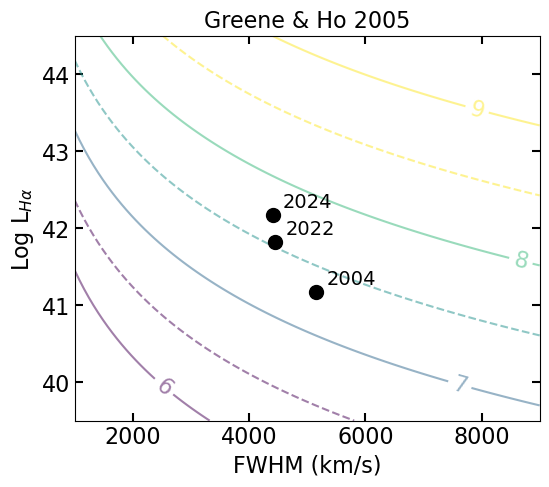

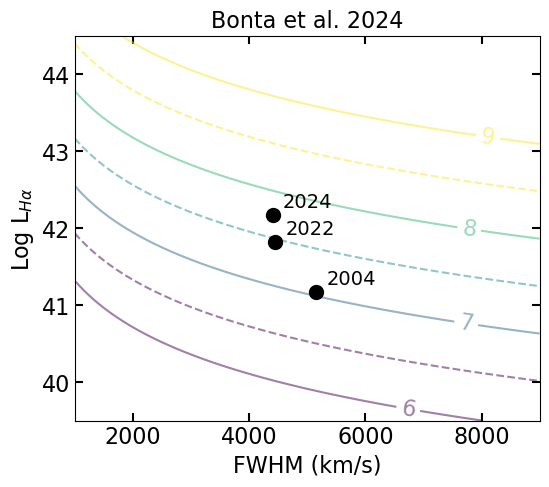

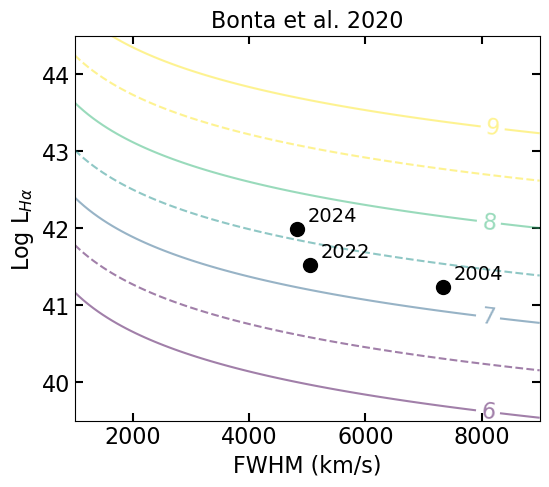

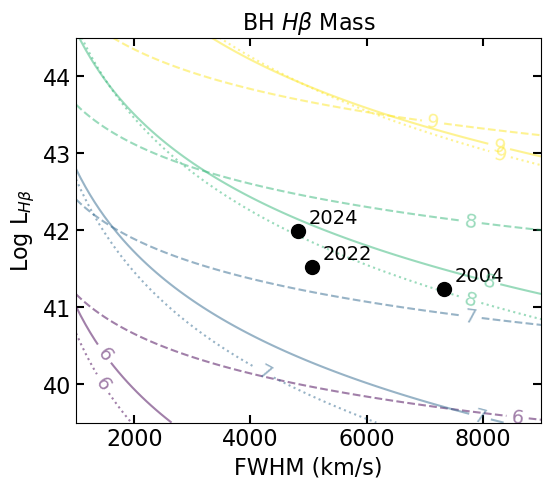

/var/folders/xh/cn2wpsv14nl8l0l1cpqbh9fw0000gp/T/ipykernel_4449/3059173341.py:208: UserWarning: The following kwargs were not used by contour: 'label'
  C1 = ax[1].contour(X, Y, Z1, [6,7,8,9], alpha=0.5, linestyles='--', label='B20') # mass contour for Bonta 2020 Hb
/var/folders/xh/cn2wpsv14nl8l0l1cpqbh9fw0000gp/T/ipykernel_4449/3059173341.py:209: UserWarning: The following kwargs were not used by contour: 'label'
  C2 = ax[1].contour(X, Y, Z2, [6,7,8,9], alpha=0.5, linestyles='-', label='GH05') # Greene 2005
/var/folders/xh/cn2wpsv14nl8l0l1cpqbh9fw0000gp/T/ipykernel_4449/3059173341.py:210: UserWarning: The following kwargs were not used by contour: 'label'
  C3 = ax[1].contour(X, Y, Z3, [6,7,8,9], alpha=0.5, linestyles='dotted', label='VP06') # VP06 Hb
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


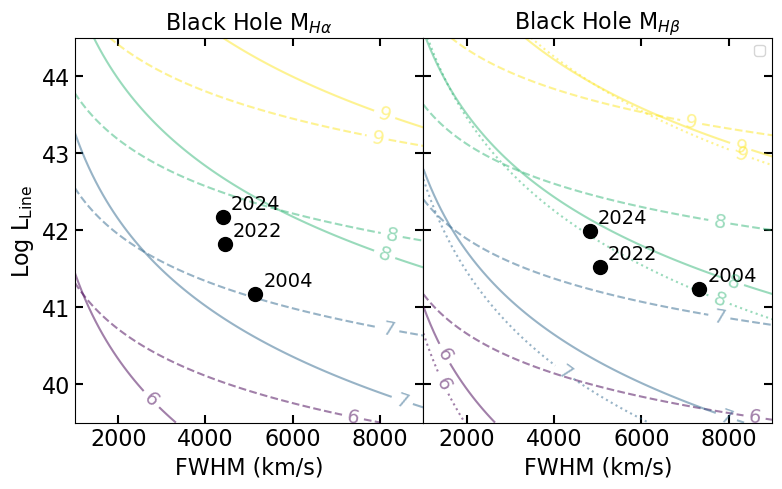

In [23]:
# Create Width and Luminosity values
x = np.linspace(1000, 9000, 100) # FWHM
y = np.linspace(39.5, 44.5, 100) # LogLuminosity
X, Y = np.meshgrid(x, y)


# Greene & Ho 2005 Ha Mass Contour
Z = G05_Ha(Y, X) # function takes logL first then W (fwhm)
# Plot
fig, ax = plt.subplots(figsize=(6,5))

# Create contours
labelC = ax.contour(X, Y, Z, [6,7,8,9], alpha=0.5) # contours to label
C = ax.contour(X, Y, Z, [6.5,7.5,8.5], alpha=0.5, linestyles='--')
ax.clabel(labelC, fontsize=16)

# Plot data
ax.plot(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

# Label data
ax.text(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'].values[0] + 180, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']).values[0] + 0.1, '2004', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'].values[1] + 180, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']).values[1] + 0.1, '2022', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='GreeneHa', 'fwhm'].values[2] + 180, np.log10(estimates_df.loc[estimates_df['model']=='GreeneHa', 'L']).values[2] + 0.1, '2024', fontsize=14)

# Axis labels
ax.set_title('Greene & Ho 2005', fontsize=16)
ax.set_xlabel(r'FWHM (km/s)', fontsize=16)
ax.set_ylabel(r'Log L$_{H \alpha }$', fontsize=16)

# Axis customization
ax.tick_params(labelsize=15)
ax.tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "G05_HA_BHMass_Contour.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()




# Bonta et al. 2024 Ha Mass Contour
Z = B24_Ha(Y, X) # function takes logL first then W (fwhm)
# Plot
fig, ax = plt.subplots(figsize=(6,5))

# Create contours
labelC = ax.contour(X, Y, Z, [6,7,8,9], alpha=0.5) # contours to label
C = ax.contour(X, Y, Z, [6.5,7.5,8.5], alpha=0.5, linestyles='--')
ax.clabel(labelC, fontsize=16)

# Plot data
ax.plot(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

# Label data
ax.text(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'].values[0] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']).values[0] + 0.1, '2004', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'].values[1] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']).values[1] + 0.1, '2022', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'].values[2] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']).values[2] + 0.1, '2024', fontsize=14)

# Axis labels
ax.set_title('Bonta et al. 2024', fontsize=16)
ax.set_xlabel(r'FWHM (km/s)', fontsize=16)
ax.set_ylabel(r'Log L$_{H \alpha }$', fontsize=16)

# Axis customization
ax.tick_params(labelsize=15)
ax.tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "B24_HA_BHMass_Contour.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()





# Bonta et al. 2024 Ha Mass Contour
Z = B20_Hb(Y, X) # function takes logL first then W (fwhm)
# Plot
fig, ax = plt.subplots(figsize=(6,5))

# Create contours
labelC = ax.contour(X, Y, Z, [6,7,8,9], alpha=0.5) # contours to label
C = ax.contour(X, Y, Z, [6.5,7.5,8.5], alpha=0.5, linestyles='--')
ax.clabel(labelC, fontsize=16)

# Plot data
ax.plot(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

# Label data
ax.text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[0] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[0] + 0.1, '2004', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[1] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[1] + 0.1, '2022', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[2] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[2] + 0.1, '2024', fontsize=14)

# Axis labels
ax.set_title('Bonta et al. 2020', fontsize=16)
ax.set_xlabel(r'FWHM (km/s)', fontsize=16)
ax.set_ylabel(r'Log L$_{H \alpha }$', fontsize=16)

# Axis customization
ax.tick_params(labelsize=15)
ax.tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "B20_HB_BHMass_Contour.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()





# HB Line Parameter with Mass contours
# Plot
fig, ax = plt.subplots(figsize=(6,5))

Z1 = B20_Hb(Y, X) # function takes logL first then W (fwhm)
Z2 = G05_Hb(Y, X)
Z3 = VP06_logL(Y, X)

# Create contours
C1 = ax.contour(X, Y, Z1, [6,7,8,9], alpha=0.5, linestyles='--') # mass contour for Bonta 2020 Hb
C2 = ax.contour(X, Y, Z2, [6,7,8,9], alpha=0.5, linestyles='-') # Greene 2005
C3 = ax.contour(X, Y, Z3, [6,7,8,9], alpha=0.5, linestyles='dotted') # Vestergaard & Peterson 2006
ax.clabel(C1, fontsize=14)
ax.clabel(C2, fontsize=14)
ax.clabel(C3, fontsize=14)

# Plot data
ax.plot(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

# Label data
ax.text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[0] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[0] + 0.1, '2004', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[1] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[1] + 0.1, '2022', fontsize=14)
ax.text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[2] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[2] + 0.1, '2024', fontsize=14)

# Axis labels
ax.set_title(r'BH ${H \beta }$ Mass', fontsize=16)
ax.set_xlabel(r'FWHM (km/s)', fontsize=16)
ax.set_ylabel(r'Log L$_{H \beta }$', fontsize=16)

# Axis customization
ax.tick_params(labelsize=15)
ax.tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "BHMass_Model_Contours.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()





# Make plot for Greene & Ho 2005 Model
fig, ax = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
plt.subplots_adjust(wspace=0)  # Adjust the width space between subplots


# Ha left plot
Z1 = B24_Ha(Y, X)
Z2 = G05_Ha(Y, X)

# Create contours
C1 = ax[0].contour(X, Y, Z1, [6,7,8,9], alpha=0.5, linestyles='--') # mass contour for Bonta 2020 Ha
C2 = ax[0].contour(X, Y, Z2, [6,7,8,9], alpha=0.5, linestyles='-') # Greene 2005
ax[0].clabel(C1, fontsize=14)
ax[0].clabel(C2, fontsize=14)

# Plot data
ax[0].plot(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

# Label data
ax[0].text(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'].values[0] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']).values[0] + 0.1, '2004', fontsize=14)
ax[0].text(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'].values[1] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']).values[1] + 0.1, '2022', fontsize=14)
ax[0].text(estimates_df.loc[estimates_df['model']=='BontaHa', 'fwhm'].values[2] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHa', 'L']).values[2] + 0.1, '2024', fontsize=14)

# Axis labels
ax[0].set_title(r'Black Hole M$_{H \alpha }$', fontsize=16)
ax[0].set_xlabel(r'FWHM (km/s)', fontsize=16)
ax[0].set_ylabel(r'Log L$_{\text{Line}}$', fontsize=16)

# Axis customization
ax[0].tick_params(labelsize=15)
ax[0].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[0].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)


# Hb right plot
Z1 = B20_Hb(Y, X)
Z2 = G05_Hb(Y, X)
Z3 = VP06_logL(Y, X)

# Create contours
C1 = ax[1].contour(X, Y, Z1, [6,7,8,9], alpha=0.5, linestyles='--', label='B20') # mass contour for Bonta 2020 Hb
C2 = ax[1].contour(X, Y, Z2, [6,7,8,9], alpha=0.5, linestyles='-', label='GH05') # Greene 2005
C3 = ax[1].contour(X, Y, Z3, [6,7,8,9], alpha=0.5, linestyles='dotted', label='VP06') # VP06 Hb
ax[1].clabel(C1, fontsize=14)
ax[1].clabel(C2, fontsize=14)
ax[1].clabel(C3, fontsize=14)

# Plot data
ax[1].plot(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'], np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']), linestyle='None', marker='o', markersize=10, color='black', zorder=3)

# Label data
ax[1].text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[0] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[0] + 0.1, '2004', fontsize=14)
ax[1].text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[1] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[1] + 0.1, '2022', fontsize=14)
ax[1].text(estimates_df.loc[estimates_df['model']=='BontaHb', 'fwhm'].values[2] + 180, np.log10(estimates_df.loc[estimates_df['model']=='BontaHb', 'L']).values[2] + 0.1, '2024', fontsize=14)

# Axis labels
ax[1].set_title(r'Black Hole M$_{H \beta }$', fontsize=16)
ax[1].set_xlabel(r'FWHM (km/s)', fontsize=16)

# Axis customization
ax[1].tick_params(labelsize=15)
ax[1].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[1].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)

ax[1].legend()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "BHMass_Model_Contours_HaHb.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

# Plot Model Comparison

Modularize as much as possible to add/remove models swiftly in a subplot fashion

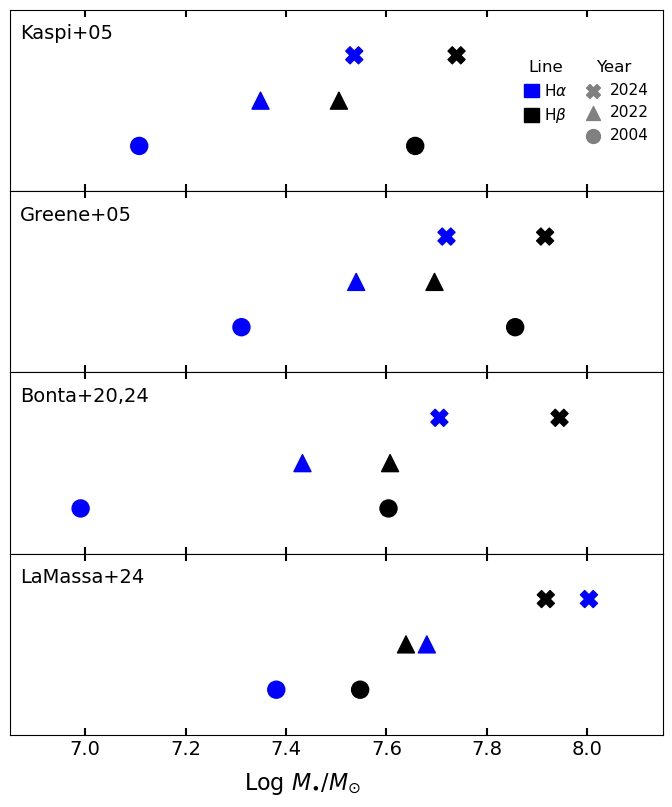

In [323]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(9, 10), sharex=True)

# Plot Kaspi+05 Model
ax1.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax1.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax1.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax1.text(6.87, 2.35, 'Kaspi+05', color='black', fontsize=14)

# Plot Greene+05 Model
ax2.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax2.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax2.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax2.text(6.87, 2.35, 'Greene+05', color='black', fontsize=14)

# Plot Bonta+20,24 Model
ax3.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax3.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax3.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax3.text(6.87, 2.35, 'Bonta+20,24', color='black', fontsize=14)

# Plot LaMassa+24 Model
ax4.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax4.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax4.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax4.text(6.87, 2.35, 'LaMassa+24', color='black', fontsize=14)

# Subplot axis style
for ax in [ax1, ax2, ax3, ax4]:
    # Give all plots the same y-axis ticks and labels
    #ax.set_yticks([0, 1, 2]) # Set the y-tick positions
    #ax.set_yticklabels(["2004", "2022", "2024"])  # Set the y-tick labels
    ax.set_ylim(-1, 3)
    ax.set_xlim(6.85, 8.15)
    # Add x-ticks inside plot on top and bottom
    ax.tick_params(axis='x', which='both', direction='in', top=True, bottom=True, labelsize=14, length=5, width=1.5)
    ax.tick_params(axis='y', direction='in', which='both', left=False, labelleft=False)

# Add shared title, x-axis label, and y-axis label
fig.text(0.5, 0.1, r"Log $M_{\bullet}/M_{\odot}$", ha='center', fontsize=16)  # Shared x-axis label
#fig.text(0.08, 0.5, 'Year', va='center', rotation='vertical', fontsize=16)  # Shared y-axis label


# Custom Legend's
# First legend for color grouping Ha and Hb lines
blue_patch = mpatches.Patch(color='blue', label=r"H$\alpha$") # Empty patch for marker colour
black_patch = mpatches.Patch(color='black', label=r"H$\beta$")
'''
legend1 = ax4.legend(handles=[black_patch, blue_patch], loc='upper right', bbox_to_anchor=(0.125,0.65), title="Line", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.3, handlelength=1, handleheight=1)
# Add the first legend to the plot
ax4.add_artist(legend1)
# Second legend for marker shape showing epoch
ax4.scatter([], [], color='grey', s=100, marker='o',label='2004')  # Empty scatter for marker type
ax4.scatter([], [], color='grey', s=100, marker='^',label='2022')
ax4.scatter([], [], color='grey', s=100, marker='X',label='2024')
ax4.legend(loc='upper right', bbox_to_anchor=(0.25,0.65), title="Year", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.1)
'''
legend1 = ax1.legend(handles=[blue_patch, black_patch], loc='upper right', bbox_to_anchor=(0.875,0.8), title="Line", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.3, handlelength=1, handleheight=1)
# Add the first legend to the plot
ax1.add_artist(legend1)
# Second legend for marker shape showing epoch
ax1.scatter([], [], color='grey', s=100, marker='X',label='2024')  # Empty scatter for marker type
ax1.scatter([], [], color='grey', s=100, marker='^',label='2022')
ax1.scatter([], [], color='grey', s=100, marker='o',label='2004')
ax1.legend(loc='upper right', bbox_to_anchor=(1,0.8), title="Year", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.1)


# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.155, left=0.175)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "BHMassModelComparison.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

#### Plot Model Comparison with Vestergaard

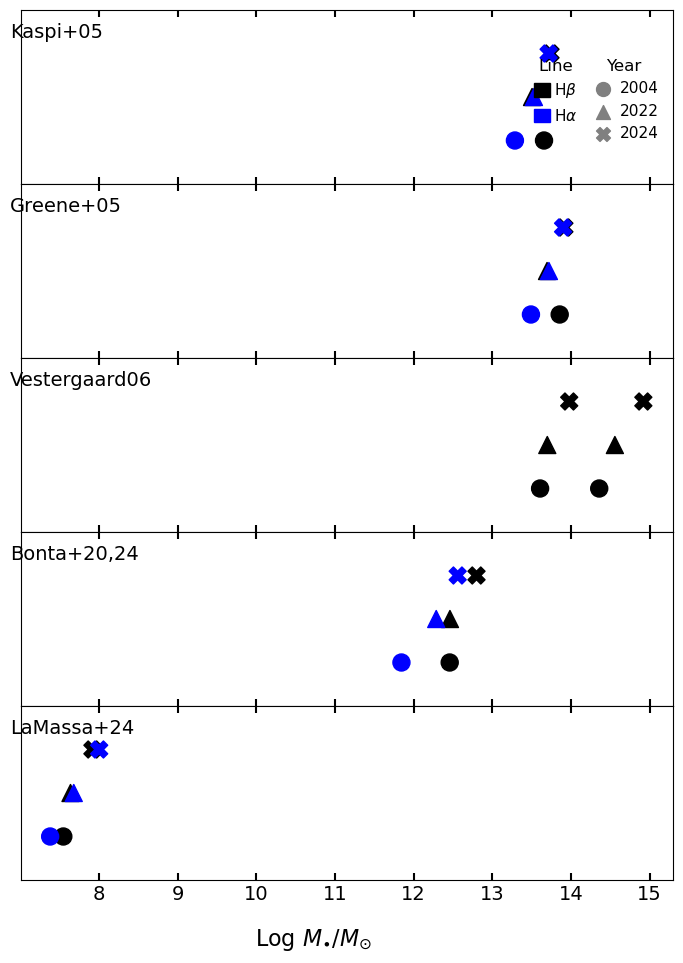

In [270]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(9, 12), sharex=True)

# Plot Kaspi+05 Model
ax1.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax1.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax1.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax1.text(6.87, 2.35, 'Kaspi+05', color='black', fontsize=14)

# Plot Greene+05 Model
ax2.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax2.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax2.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax2.text(6.87, 2.35, 'Greene+05', color='black', fontsize=14)

# Plot Vestergaard 06 Model
ax3.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Vestergaard')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'black']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax3.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Vestergaard')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'black'])
ax3.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Vestergaard')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'black'])
ax3.text(6.87, 2.35, 'Vestergaard06', color='black', fontsize=14)

# Plot Bonta+20,24 Model
ax4.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax4.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax4.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax4.text(6.87, 2.35, 'Bonta+20,24', color='black', fontsize=14)

# Plot LaMassa+24 Model
ax5.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [2,2], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
ax5.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [1,1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
ax5.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [0,0], linestyle='None', marker='o', s=150, color=['black', 'blue'])
ax5.text(6.87, 2.35, 'LaMassa+24', color='black', fontsize=14)

# Subplot axis style
for ax in [ax1, ax2, ax3, ax4, ax5]:
    # Give all plots the same y-axis ticks and labels
    #ax.set_yticks([0, 1, 2]) # Set the y-tick positions
    #ax.set_yticklabels(["2004", "2022", "2024"])  # Set the y-tick labels
    ax.set_ylim(-1, 3)
    #ax.set_xlim(6.85, 8.15)
    # Add x-ticks inside plot on top and bottom
    ax.tick_params(axis='x', which='both', direction='in', top=True, bottom=True, labelsize=14, length=5, width=1.5)
    ax.tick_params(axis='y', direction='in', which='both', left=False, labelleft=False)

# Add shared title, x-axis label, and y-axis label
fig.text(0.5, 0.1, r"Log $M_{\bullet}/M_{\odot}$", ha='center', fontsize=16)  # Shared x-axis label
#fig.text(0.08, 0.5, 'Year', va='center', rotation='vertical', fontsize=16)  # Shared y-axis label


# Custom Legend's
# First legend for color grouping Ha and Hb lines
black_patch = mpatches.Patch(color='black', label=r"H$\beta$") # Empty patch for marker colour
blue_patch = mpatches.Patch(color='blue', label=r"H$\alpha$")
'''
legend1 = ax4.legend(handles=[black_patch, blue_patch], loc='upper right', bbox_to_anchor=(0.125,0.65), title="Line", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.3, handlelength=1, handleheight=1)
# Add the first legend to the plot
ax4.add_artist(legend1)
# Second legend for marker shape showing epoch
ax4.scatter([], [], color='grey', s=100, marker='o',label='2004')  # Empty scatter for marker type
ax4.scatter([], [], color='grey', s=100, marker='^',label='2022')
ax4.scatter([], [], color='grey', s=100, marker='X',label='2024')
ax4.legend(loc='upper right', bbox_to_anchor=(0.25,0.65), title="Year", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.1)
'''
legend1 = ax1.legend(handles=[black_patch, blue_patch], loc='upper right', bbox_to_anchor=(0.875,0.8), title="Line", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.3, handlelength=1, handleheight=1)
# Add the first legend to the plot
ax1.add_artist(legend1)
# Second legend for marker shape showing epoch
ax1.scatter([], [], color='grey', s=100, marker='o',label='2004')  # Empty scatter for marker type
ax1.scatter([], [], color='grey', s=100, marker='^',label='2022')
ax1.scatter([], [], color='grey', s=100, marker='X',label='2024')
ax1.legend(loc='upper right', bbox_to_anchor=(1,0.8), title="Year", fontsize=11, title_fontsize=12, frameon=False, handletextpad=0.1)


# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.155, left=0.175)

# Save figure
#custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
#custom_filename = "BHMassModelComparison.png"
#save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

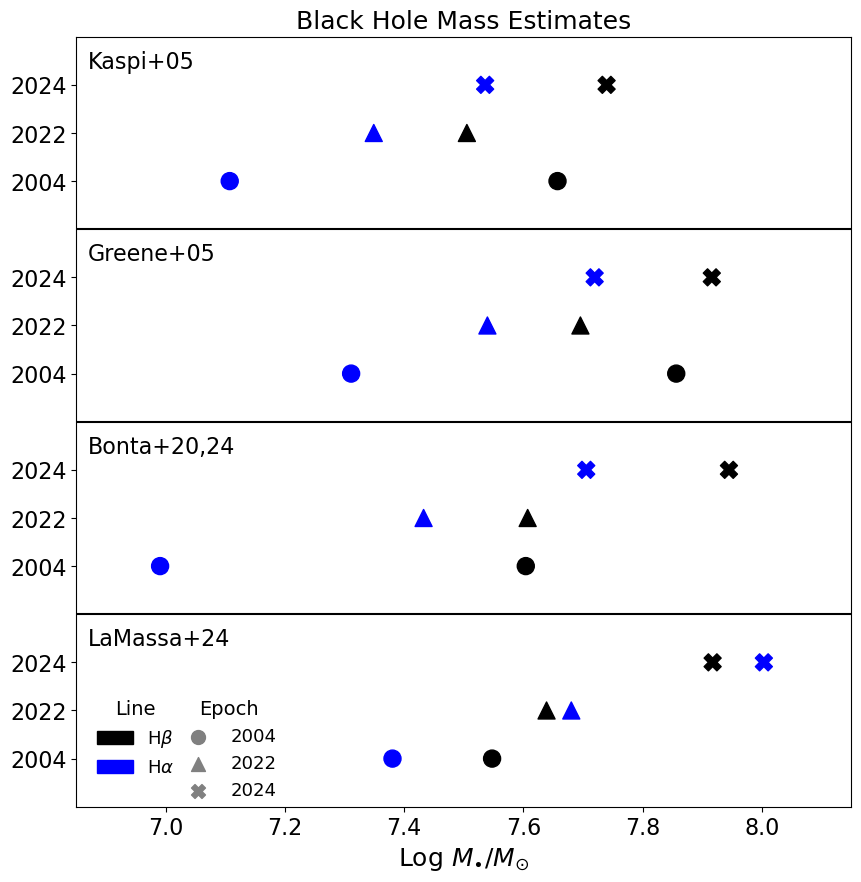

In [90]:
# Compare models
plt.figure(figsize=(10, 10))

# Plot Kaspi+05 Model
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [12,12], linestyle='None', marker='X', s=150, color=['black', 'blue']) # Colour from Hb (black) items come above Ha (blue) in the dataframe
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [11,11], linestyle='None', marker='^', s=150, color=['black', 'blue'])
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Kaspi')),'bh_mass']), [10,10], linestyle='None', marker='o', s=150, color=['black', 'blue'])
plt.text(6.87, 12.35, 'Kaspi+05', color='black', fontsize=16)

plt.axhline(9, linestyle='-', color='black')

# Plot Greene+05 Model
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [8,8], linestyle='None', marker='X', s=150, color=['black', 'blue'])
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [7,7], linestyle='None', marker='^', s=150, color=['black', 'blue'])
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Greene')),'bh_mass']), [6,6], linestyle='None', marker='o', s=150, color=['black', 'blue'])
plt.text(6.87, 8.35, 'Greene+05', color='black', fontsize=16)

plt.axhline(5, linestyle='-', color='black')

# Plot Bonta+20,24 Model
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [4,4], linestyle='None', marker='X', s=150, color=['black', 'blue'])
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [3,3], linestyle='None', marker='^', s=150, color=['black', 'blue'])
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('Bonta')),'bh_mass']), [2,2], linestyle='None', marker='o', s=150, color=['black', 'blue'])
plt.text(6.87, 4.35, 'Bonta+20,24', color='black', fontsize=16)

plt.axhline(1, linestyle='-', color='black')

# Plot LaMassa+24 Model
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2024) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [0,0], linestyle='None', marker='X', s=150, color=['black', 'blue'])
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2022) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [-1,-1], linestyle='None', marker='^', s=150, color=['black', 'blue'])
plt.scatter(np.log10(estimates_df.loc[(estimates_df['year'] == 2004) & (estimates_df['model'].str.startswith('LaMassa')),'bh_mass']), [-2,-2], linestyle='None', marker='o', s=150, color=['black', 'blue'])
plt.text(6.87, 0.35, 'LaMassa+24', color='black', fontsize=16)


# Customize plot axis and labels
plt.ylim(-3, 13)
plt.xlim(6.85, 8.15)
plt.title('Black Hole Mass Estimates', fontsize=18)
plt.xlabel(r"Log $M_{\bullet}/M_{\odot}$", fontsize=18)
plt.yticks(ticks=[12,11,10, 8,7,6, 4,3,2, 0,-1,-2], labels=['2024','2022','2004', '2024','2022','2004', '2024','2022','2004', '2024','2022','2004'], fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Custom Legend's
# First legend for color grouping Ha and Hb lines
black_patch = mpatches.Patch(color='black', label=r"H$\beta$") # Empty patch for marker colour
blue_patch = mpatches.Patch(color='blue', label=r"H$\alpha$")
legend1 = plt.legend(handles=[black_patch, blue_patch], loc='upper right', bbox_to_anchor=(0.148,0.16), title="Line", fontsize=13, title_fontsize=14, frameon=False)
# Add the first legend to the plot
plt.gca().add_artist(legend1)
# Second legend for marker shape showing epoch
plt.scatter([], [], color='grey', s=100, marker='o',label='2004')  # Empty scatter for marker type
plt.scatter([], [], color='grey', s=100, marker='^',label='2022')
plt.scatter([], [], color='grey', s=100, marker='X',label='2024')
plt.legend(loc='upper right', bbox_to_anchor=(0.28,0.16), title="Epoch", fontsize=13, title_fontsize=14, frameon=False)

plt.savefig('/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/BHMassModelComparison.png')
plt.show()

#### Read Spectroscopy Data

In [91]:
L5100_24 = 10**conti_results_1br_24['L5100'][0]
L5100_err_24 = 10**conti_results_1br_24['L5100_err'][0]
HB_fwhm_24 = 4821.664202238680
HB_fwhm_err_24 = 3355.622604379010
HA_fwhm_24 = 4405.7843703927900
HA_fwhm_err_24 = 78.13652536181870

L5100_22 = 10**conti_results_1br_22['L5100'][0]
L5100_err_22 = 10**conti_results_1br_22['L5100_err'][0]
HB_fwhm_22 = 5055.909446691620
HB_fwhm_err_22 = 231.2066055281800
HA_fwhm_22 = 4449.927551732380
HA_fwhm_err_22 = 71.89073212554650

L5100_09 = 10**conti_results_1br_09['L5100'][0]
L5100_err_09 = 10**conti_results_1br_09['L5100_err'][0]
#HB_fwhm_09 = 6612.317375 # These are using the individual HB/A_br FWHM measurements that dont have errors?
#HB_fwhm_err_09 = 
#HA_fwhm_09 = 5146.579932
#HA_fwhm_err_09 = 
HB_fwhm_09 = 7332.804313996017 # These are using the whole FWHM measurements including errors
HB_fwhm_err_09 = 424.31949820433556
HA_fwhm_09 = 5146.579931998067
HA_fwhm_err_09 = 225.12000654465555

NameError: name 'conti_results_1br_09' is not defined

#### Manual Spectroscopic Data Input

In [43]:
z = 0.07455

logf        = 0.683 # from DBonta* (I think) paper in Equation (21)
logf_err    = 0.03  # check in paper (taken to be unity initially)
#logf_err    = 0.150

# 2009 HB Line Parameters
fwhm_ng1_09 = 8845.62575518447 # q_mle parameter with 1 broad gaussian component - ngauss = 1
area_ng1_09 = 1228.5537947042749

fwhm_ng1_09 = 11478.343361496665 # q_mle MC = True, nsamp = 400 (was false so no errors and nsamp = 200)
fwhm_ng1_err_09 = 5717.510447308213
area_ng1_09 = 1457.7483977185866
area_ng1_err_09 = 64.89108728641679

fwhm_ng2_09 = 11478.343361496665 # q_mcmc parameter with 2 broad gaussian component - ngauss = 2 (can't force code to use 1 yet, it defaults to 2)
fwhm_ng2_err_09 = 5636.379251933966
area_ng2_09 = 1457.7483977185866
area_ng2_err_09 = 66.72866979675848

# 2022 HB Line Parameters
fwhm_ng1_22 = 5084.436178854739 # q_mle parameter with 1 broad gaussian component - ngauss = 1
area_ng1_22 = 2421.07395598318

fwhm_ng1_22 = 5053.119024788454 # q_mle MC = True, nsamp = 400 (was false so no errors and nsamp = 200)
fwhm_ng1_err_22 = 262.5802736438318
area_ng1_22 = 2378.7838906630955
area_ng1_err_22 = 122.72514493866879

fwhm_ng2_22 = 4841.674282441945 # q_mcmc parameter with 2 broad gaussian component - ngauss = 2 (can't force code to use 1 yet, it defaults to 2)
fwhm_ng2_err_22 = 299.2065304359503
area_ng2_22 = 2402.658509730434
area_ng2_err_22 = 87.76346024039844

# 2009 HA Line Parameters - Also used nsamp = 400
fwhm_Ha_09 = 5181.632829576172
fwhm_Ha_09_err = 376.5703955941167
area_Ha_09 = 1189.249765083097
area_Ha_09_err = 46.53369871724135

# 2022 HA Line Parameters
fwhm_Ha_22 = 4088.0430147108086
fwhm_Ha_22_err = 107.08500482578074
area_Ha_22 = 4843.111733252819
area_Ha_22_err = 119.1566844456388


# 2004 HB & HA Line Parameters MCMC calculated with ngauss forced to be 1 for broad component
fwhm_Hb_mcmc_09 = 9181.937198482863
fwhm_Hb_mcmc_09_err = 463.3059009728331
area_Hb_mcmc_09 = 1216.6735742170697
area_Hb_mcmc_09_err = 44.69774019982515

fwhm_Ha_mcmc_09 = 4686.505461620567
fwhm_Ha_mcmc_09_err = 98.54845941164058
area_Ha_mcmc_09 = 1293.1105846973057
area_Ha_mcmc_09_err = 32.544979572671195

# 2022 HB & HA Line Parameters MCMC calculated with ngauss forced to be 1 for broad component
fwhm_Hb_mcmc_22 = 5091.660202209681
fwhm_Hb_mcmc_22_err = 208.6893323665663
area_Hb_mcmc_22 = 2406.1029791298483
area_Hb_mcmc_22_err = 73.3487233649737

fwhm_Ha_mcmc_22 = 4462.335489029091
fwhm_Ha_mcmc_22_err = 78.4496457123314
area_Ha_mcmc_22 = 4642.740378560615
area_Ha_mcmc_22_err = 107.65180534467027

# 2023 HA Line parameters MCMC ngauss=1 br line
fwhm_Ha_mcmc_23 = 4353.101111478713
fwhm_Ha_mcmc_23_err = 63.850221030694684
area_Ha_mcmc_23 = 8476.843877524843
area_Ha_mcmc_23_err = 137.75342352633925

# 2024 HB & HA Line parameters MCMC calculated with ngauss = 1 for broad component
fwhm_Hb_mcmc_24 = 4821.664202238678
fwhm_Hb_mcmc_24_err = 2190.92666119389
area_Hb_mcmc_24 = 7152.68666896135
area_Hb_mcmc_24_err = 243.1725499243621

fwhm_Ha_mcmc_24 = 4405.7843703927865
fwhm_Ha_mcmc_24_err = 83.4780694041965
area_Ha_mcmc_24 = 10798.5238158878
area_Ha_mcmc_24_err = 205.5722304714991

#### Single Epoch Black Hole Mass Estimations

In [44]:
def Bonta20_HB_Mass(fwhm, flux, logf, z, fwhm_err=None, flux_err=None, logf_err=None):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    # Calculate mass of the black hole
    logM = logf + 7.015 + 0.784*( np.log10(L)-42 ) + 1.387*( np.log10(fwhm)-3.5 )
    # Calculate uncertainty if errors given
    if ((fwhm_err!=None) and (flux_err!=None) and (logf_err!=None)):
        L_err = ((flux_err*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
        
        # propagate errors into log-space
        logL_err = L_err / (np.log(10) * L)
        logFWHM_err = fwhm_err / (np.log(10) * fwhm)
        #print(L + L_err)
        #print(logL_err)
        #print(logFWHM_err)
        logM_err = np.sqrt( (logf_err)**2 + (0.784 * logL_err)**2 + (1.387 * logFWHM_err)**2 )
        
        return(logM, logM_err)
    
    return(logM)

def Bonta24_HA_Mass(fwhm, flux, logf, z, fwhm_err=None, flux_err=None, logf_err=None):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    # Calculate mass of the black hole
    logM = logf + 6.688 + 0.812*( np.log10(L)-42 ) + 1.634*( np.log10(fwhm)-3.5 )
    # Calculate uncertainty if errors given
    if ((fwhm_err!=None) and (flux_err!=None) and (logf_err!=None)):
        L_err = ((flux_err*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
        
        # propagate errors into log-space
        logL_err = L_err / (np.log(10) * L)
        logFWHM_err = fwhm_err / (np.log(10) * fwhm)
        #print(L + L_err)
        #print(logL_err)
        #print(logFWHM_err)
        logM_err = np.sqrt( (logf_err)**2 + (0.812 * logL_err)**2 + (1.634 * logFWHM_err)**2 )
        
        return(logM, logM_err)
    
    return(logM)


def Greene05_HA_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 2e6 * (L/1e42)**0.55 * (fwhm/1e3)**2.06
    return(M)


def Greene05_HB_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 3.6e6 * (L/1e42)**0.56 * (fwhm/1e3)**2
    
    return(M)

def Kaspi05_HA_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 1.3e6 * (L/1e42)**0.57 * (fwhm/1e3)**2.06
    
    return(M)


def Kaspi05_HB_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 2.4e6 * (L/1e42)**0.59 * (fwhm/1e3)**2
    
    return(M)


# LaMassa et al. 2024 using AGN continuum, L, driving a given line (5100 drives both HA & HB)
def lamassa_mass(L, FWHM, a, b, c, d):
    logM = a + b * np.log10(L / 10**d) + c*np.log10(FWHM) # in solar masses
    #M = 10**logM
    return logM

#### Calculate Mass from Models

In [47]:
# Using Bonta+20,24 for Hb, Ha respectively
logM_Hb_09_mcmc_bonta, logM_Hb_09_mcmc_bonta_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, logf, z, fwhm_Hb_mcmc_09_err, area_Hb_mcmc_09_err, logf_err) # mcmc ngauss = 1 (hard coded)
logM_Hb_22_mcmc_bonta, logM_Hb_22_mcmc_bonta_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, logf, z, fwhm_Hb_mcmc_22_err, area_Hb_mcmc_22_err, logf_err)
logM_Hb_24_mcmc_bonta, logM_Hb_24_mcmc_bonta_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_24, area_Hb_mcmc_24, logf, z, fwhm_Hb_mcmc_24_err, area_Hb_mcmc_24_err, logf_err)

logM_Ha_09_mcmc_bonta, logM_Ha_09_mcmc_bonta_err = Bonta24_HA_Mass(fwhm_Hb_mcmc_09, area_Ha_mcmc_09, logf, z, fwhm_Ha_mcmc_09_err, area_Ha_mcmc_09_err, logf_err) # mcmc ngauss = 1 (hard coded)
logM_Ha_22_mcmc_bonta, logM_Ha_22_mcmc_bonta_err = Bonta24_HA_Mass(fwhm_Hb_mcmc_22, area_Ha_mcmc_22, logf, z, fwhm_Ha_mcmc_22_err, area_Ha_mcmc_22_err, logf_err)
logM_Ha_24_mcmc_bonta, logM_Ha_24_mcmc_bonta_err = Bonta24_HA_Mass(fwhm_Hb_mcmc_24, area_Ha_mcmc_24, logf, z, fwhm_Ha_mcmc_24_err, area_Ha_mcmc_24_err, logf_err)

# Using Greene 2005 BH Mass estimation using both Ha and Hb
M_Ha_09_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Ha_23_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_23, area_Ha_mcmc_23, z)
M_Ha_24_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_24, area_Ha_mcmc_24, z)
M_Hb_09_mcmc_greene = Greene05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc_greene = Greene05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)
M_Hb_24_mcmc_greene = Greene05_HB_Mass(fwhm_Hb_mcmc_24, area_Hb_mcmc_24, z)


# Using Kaspi 2005 (similar to Greene 2005)
M_Ha_09_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Ha_23_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_23, area_Ha_mcmc_23, z)
M_Ha_24_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_24, area_Ha_mcmc_24, z)
M_Hb_09_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)
M_Hb_24_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_24, area_Hb_mcmc_24, z)

# Using LaMassa 2024 HB and HA FWHM measurements with L5100 continuum luminosity
logM_HB_lamassa24_24 = lamassa_mass(L5100_24, HB_fwhm_24, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_24 = lamassa_mass(L5100_24, HA_fwhm_24, 0.807, 0.519, 2.06, 44)
logM_HB_lamassa24_22 = lamassa_mass(L5100_22, HB_fwhm_22, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_22 = lamassa_mass(L5100_22, HA_fwhm_22, 0.807, 0.519, 2.06, 44)
logM_HB_lamassa24_09 = lamassa_mass(L5100_09, HB_fwhm_09, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_09 = lamassa_mass(L5100_09, HA_fwhm_09, 0.807, 0.519, 2.06, 44)

print('a) B20 HB Mass MCMC Fit 2009: ' + "{:.3e}".format(10**logM_Hb_09_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Hb_09_mcmc_bonta * np.log(10)) * logM_Hb_09_mcmc_bonta_err) + " M_sun")
print('b) B20 HB Mass MCMC Fit 2022: ' + "{:.3e}".format(10**logM_Hb_22_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Hb_22_mcmc_bonta * np.log(10)) * logM_Hb_22_mcmc_bonta_err) + " M_sun")
print("c) G05 HB Mass 2009: " + "{:.3e}".format(M_Hb_09_mcmc_greene)+ " M_sun")
print("d) G05 HB Mass 2022: " + "{:.3e}".format(M_Hb_22_mcmc_greene)+ " M_sun")
print("e) G05 HA Mass 2009: " + "{:.3e}".format(M_Ha_09_mcmc_greene)+ " M_sun")
print("f) G05 HA Mass 2022: " + "{:.3e}".format(M_Ha_22_mcmc_greene)+ " M_sun")
print("g) K05 HB Mass 2009: " + "{:.3e}".format(M_Hb_09_mcmc_kaspi)+ " M_sun")
print("h) K05 HB Mass 2022: " + "{:.3e}".format(M_Hb_22_mcmc_kaspi)+ " M_sun")
print("i) K05 HA Mass 2009: " + "{:.3e}".format(M_Ha_09_mcmc_kaspi)+ " M_sun")
print("j) K05 HA Mass 2022: " + "{:.3e}".format(M_Ha_22_mcmc_kaspi)+ " M_sun")
print("k) L24 HB Mass 2009: " + "{:.3e}".format(10**logM_HB_lamassa24_09) + " M_sun")
print("l) L24 HB Mass 2022: " + "{:.3e}".format(10**logM_HB_lamassa24_22) + " M_sun")
print("m) L24 HA Mass 2009: " + "{:.3e}".format(10**logM_HA_lamassa24_09) + " M_sun")
print("n) L24 HA Mass 2022: " + "{:.3e}".format(10**logM_HA_lamassa24_22) + " M_sun")
print('o) B20 HB Mass MCMC Fit 2024: ' + "{:.3e}".format(10**logM_Hb_24_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Hb_24_mcmc_bonta * np.log(10)) * logM_Hb_24_mcmc_bonta_err) + " M_sun")
print("p) G05 HB Mass 2024: " + "{:.3e}".format(M_Hb_24_mcmc_greene)+ " M_sun")
print("q) G05 HA Mass 2024: " + "{:.3e}".format(M_Ha_24_mcmc_greene)+ " M_sun")
print("r) K05 HB Mass 2024: " + "{:.3e}".format(M_Hb_24_mcmc_kaspi)+ " M_sun")
print("s) K05 HA Mass 2024: " + "{:.3e}".format(M_Ha_24_mcmc_kaspi)+ " M_sun")
print("t) G05 HA Mass 2023: " + "{:.3e}".format(M_Ha_23_mcmc_greene)+ " M_sun")
print("u) K05 HA Mass 2023: " + "{:.3e}".format(M_Ha_23_mcmc_kaspi)+ " M_sun")
print("v) L24 HB Mass 2024: " + "{:.3e}".format(10**logM_HB_lamassa24_24) + " M_sun")
print("w) L24 HA Mass 2024: " + "{:.3e}".format(10**logM_HA_lamassa24_24) + " M_sun")
print('x) B24 HA Mass MCMC Fit 2009: ' + "{:.3e}".format(10**logM_Ha_09_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Ha_09_mcmc_bonta * np.log(10)) * logM_Ha_09_mcmc_bonta_err) + " M_sun")
print('y) B24 HA Mass MCMC Fit 2022: ' + "{:.3e}".format(10**logM_Ha_22_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Ha_22_mcmc_bonta * np.log(10)) * logM_Ha_22_mcmc_bonta_err) + " M_sun")
print('z) B24 HA Mass MCMC Fit 2024: ' + "{:.3e}".format(10**logM_Ha_24_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Ha_24_mcmc_bonta * np.log(10)) * logM_Ha_24_mcmc_bonta_err) + " M_sun")

a) B20 HB Mass MCMC Fit 2009: 5.343e+07 +- 5.474e+06 M_sun
b) B20 HB Mass MCMC Fit 2022: 4.025e+07 +- 3.727e+06 M_sun
c) G05 HB Mass 2009: 1.109e+08 M_sun
d) G05 HB Mass 2022: 4.994e+07 M_sun
e) G05 HA Mass 2009: 1.853e+07 M_sun
f) G05 HA Mass 2022: 3.384e+07 M_sun
g) K05 HB Mass 2009: 7.003e+07 M_sun
h) K05 HB Mass 2022: 3.220e+07 M_sun
i) K05 HA Mass 2009: 1.164e+07 M_sun
j) K05 HA Mass 2022: 2.180e+07 M_sun
k) L24 HB Mass 2009: 3.528e+07 M_sun
l) L24 HB Mass 2022: 4.354e+07 M_sun
m) L24 HA Mass 2009: 2.402e+07 M_sun
n) L24 HA Mass 2022: 4.791e+07 M_sun
o) B20 HB Mass MCMC Fit 2024: 8.768e+07 +- 5.564e+07 M_sun
p) G05 HB Mass 2024: 8.244e+07 M_sun
q) G05 HA Mass 2024: 5.244e+07 M_sun
r) K05 HB Mass 2024: 5.491e+07 M_sun
s) K05 HA Mass 2024: 3.435e+07 M_sun
t) G05 HA Mass 2023: 4.478e+07 M_sun
u) K05 HA Mass 2023: 2.919e+07 M_sun
v) L24 HB Mass 2024: 8.271e+07 M_sun
w) L24 HA Mass 2024: 1.008e+08 M_sun
x) B24 HA Mass MCMC Fit 2009: 3.271e+07 +- 2.425e+06 M_sun
y) B24 HA Mass MCMC Fit 

#### Monte Carlo Sampling to Obtain Errors

In [6]:
def MassMCSample(model, N, fwhm, fwhm_err, flux, flux_err):
    z = 0.07455
    sample_result = np.zeros(N, dtype=float) # create array to store results
    # Use specified model
    if model == 'Bonta':
        logf = 0.683 # from paper in Equation (21)
        logf_err = 0.03  # check in paper (taken to be unity initially)
        
        fwhm_sample = np.random.normal(fwhm, fwhm_err, N)
        flux_sample = np.random.normal(flux, flux_err, N)
        
        mass_sample = Bonta20_HB_Mass(fwhm_sample, flux_sample, logf, z)
    
    return np.mean(mass_sample), np.std(mass_sample)


'''
logM_09_mcmc, logM_09_mcmc_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, logf, z, fwhm_Hb_mcmc_09_err, area_Hb_mcmc_09_err, logf_err) # mcmc ngauss = 1 (hard coded)
logM_22_mcmc, logM_22_mcmc_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, logf, z, fwhm_Hb_mcmc_22_err, area_Hb_mcmc_22_err, logf_err)

# Using Greene 2005 BH Mass estimation using both Ha and Hb
M_Ha_09_mcmc = Greene05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc = Greene05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Hb_09_mcmc = Greene05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc = Greene05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)

# Using Kaspi 2005 (similar to Greene 2005)
M_Ha_09_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Hb_09_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)

# Using LaMassa 2024 HB and HA FWHM measurements with L5100 continuum luminosity
logM_HB_lamassa24_22 = lamassa_mass(L5100_22, HB_fwhm_22, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_22 = lamassa_mass(L5100_22, HA_fwhm_22, 0.807, 0.519, 2.06, 44)
logM_HB_lamassa24_09 = lamassa_mass(L5100_09, HB_fwhm_09, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_09 = lamassa_mass(L5100_09, HA_fwhm_09, 0.807, 0.519, 2.06, 44)
'''
B20_HB_09_MC, B20_HB_09_MC_err = MassMCSample('Bonta', 100, fwhm_Hb_mcmc_09, fwhm_Hb_mcmc_09_err, area_Hb_mcmc_09, area_Hb_mcmc_09_err)
10**B20_HB_09_MC_err

1.058378214737986

#### Plot Results

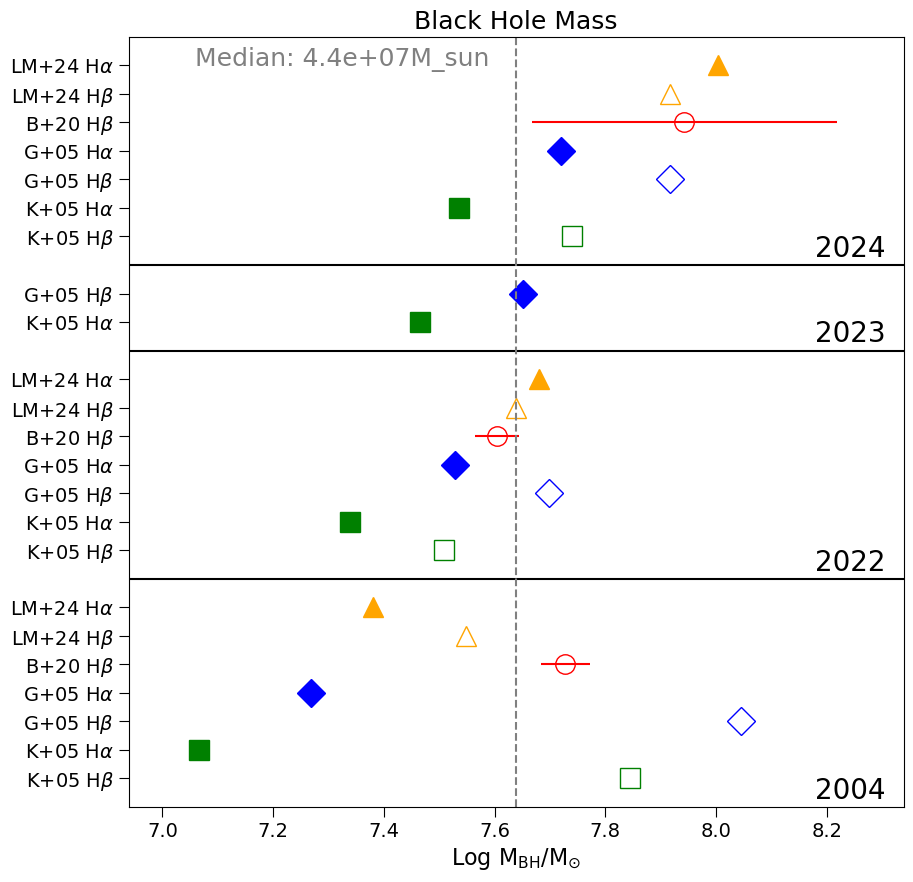

In [17]:
# Plot range of BH masses to compare to C. Bertemes et al. 2024
plt.figure(figsize=(10, 10))

plt.plot(logM_HA_lamassa24_24, 27, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_24, 26, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_24_mcmc_bonta, 25, xerr=logM_24_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_24_mcmc_greene), 24, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_24_mcmc_greene), 23, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_24_mcmc_kaspi), 22, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_24_mcmc_kaspi), 21, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(20, linestyle='-', color='black')

plt.plot(np.log10(M_Ha_23_mcmc_greene), 19, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_23_mcmc_kaspi), 18, marker='s', markersize=14, color='green')

plt.axhline(17, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_22, 16, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_22, 15, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_22_mcmc_bonta, 14, xerr=logM_22_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_22_mcmc_greene), 13, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_22_mcmc_greene), 12, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_22_mcmc_kaspi), 11, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_22_mcmc_kaspi), 10, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(9, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_09, 8, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_09, 7, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_09_mcmc_bonta, 6, xerr=logM_09_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_09_mcmc_greene), 5, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_09_mcmc_greene), 4, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_09_mcmc_kaspi), 3, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_09_mcmc_kaspi), 2, marker='s', fillstyle='none', markersize=14, color='green')

med = np.median([logM_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), np.log10(M_Ha_23_mcmc_greene), np.log10(M_Ha_23_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi), logM_HA_lamassa24_09, logM_HB_lamassa24_09, logM_09_mcmc_bonta, np.log10(M_Ha_09_mcmc_greene), np.log10(M_Hb_09_mcmc_greene), np.log10(M_Ha_09_mcmc_kaspi), np.log10(M_Hb_09_mcmc_kaspi)])
plt.axvline(med, color='grey', linestyle='--')
plt.text(med-0.58, 27, 'Median: '+str("{:.1e}".format(10**med) + r'M_sun'), fontsize=18, color='grey')
plt.text(med+0.54, 20.3, '2024', color='black', fontsize=20)
plt.text(med+0.54, 17.3, '2023', color='black', fontsize=20)
plt.text(med+0.54, 9.3, '2022', color='black', fontsize=20)
plt.text(med+0.54, 1.3, '2004', color='black', fontsize=20)

plt.ylim(1, 28)
plt.xlim(med-0.7, med+0.7)

plt.title('Black Hole Mass', fontsize=18)
#plt.yticks(ticks=[14,13,12,11,10,9,8,7,6,5,4,3,2,1], labels=[r'LaMassa+24 H$\beta$ 2009', r'LaMassa+24 H$\beta$ 2022', r'LaMassa+24 H$\alpha$ 2009', r'LaMassa+24 H$\alpha$ 2022', r'Bonta+20 H$\beta$ 2009', r'Bonta+20 H$\beta$ 2022', r'Greene+05 H$\beta$ 2009', r'Greene+05 H$\beta$ 2022', r'Greene+05 H$\alpha$ 2009', r'Greene+05 H$\alpha$ 2022', r'Kaspi+05 H$\beta$ 2009', r'Kaspi+05 H$\beta$ 2022', r'Kaspi+05 H$\alpha$ 2009', r'Kaspi+05 H$\alpha$ 2022'], fontsize=14)
plt.yticks(ticks=[27,26,25,24,23,22,21, 19,18, 16,15,14,13,12,11,10, 8,7,6,5,4,3,2], labels=[r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$'], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel(r'Log M$_{\text{BH}} / $M$_{\odot}$', fontsize=16)
plt.tick_params(length=7)

#plt.legend()
plt.savefig('/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/BHMassComplete.png')
plt.show()

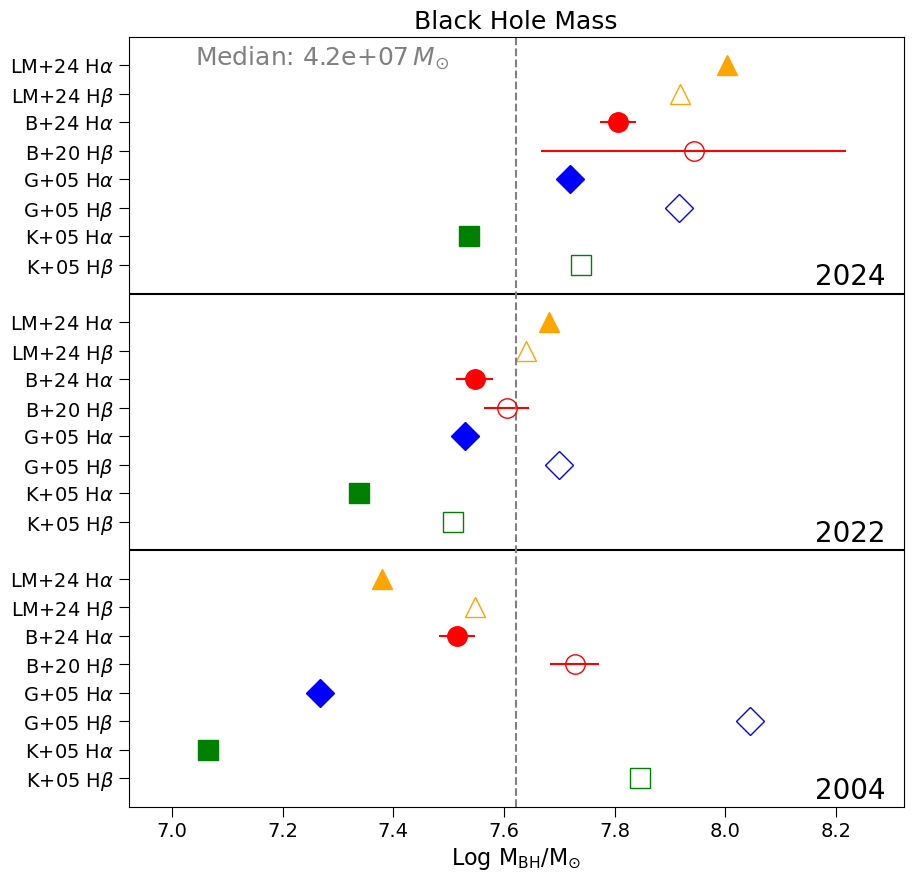

In [55]:
# Plot range of BH masses to compare to C. Bertemes et al. 2024
plt.figure(figsize=(10, 10))

plt.plot(logM_HA_lamassa24_24, 27, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_24, 26, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_Ha_24_mcmc_bonta, 25, xerr=logM_Ha_24_mcmc_bonta_err, marker='o', markersize=14, color='red')
plt.errorbar(logM_Hb_24_mcmc_bonta, 24, xerr=logM_Hb_24_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_24_mcmc_greene), 23, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_24_mcmc_greene), 22, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_24_mcmc_kaspi), 21, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_24_mcmc_kaspi), 20, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(19, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_22, 18, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_22, 17, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_Ha_22_mcmc_bonta, 16, xerr=logM_Ha_22_mcmc_bonta_err, marker='o', markersize=14, color='red')
plt.errorbar(logM_Hb_22_mcmc_bonta, 15, xerr=logM_Hb_22_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_22_mcmc_greene), 14, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_22_mcmc_greene), 13, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_22_mcmc_kaspi), 12, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_22_mcmc_kaspi), 11, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(10, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_09, 9, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_09, 8, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_Ha_09_mcmc_bonta, 7, xerr=logM_Ha_09_mcmc_bonta_err, marker='o', markersize=14, color='red')
plt.errorbar(logM_Hb_09_mcmc_bonta, 6, xerr=logM_Hb_09_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_09_mcmc_greene), 5, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_09_mcmc_greene), 4, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_09_mcmc_kaspi), 3, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_09_mcmc_kaspi), 2, marker='s', fillstyle='none', markersize=14, color='green')

med = np.median([logM_Hb_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_Hb_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi), logM_HA_lamassa24_09, logM_HB_lamassa24_09, logM_Hb_09_mcmc_bonta, np.log10(M_Ha_09_mcmc_greene), np.log10(M_Hb_09_mcmc_greene), np.log10(M_Ha_09_mcmc_kaspi), np.log10(M_Hb_09_mcmc_kaspi), logM_Ha_09_mcmc_bonta, logM_Ha_22_mcmc_bonta, logM_Ha_24_mcmc_bonta])
plt.axvline(med, color='grey', linestyle='--')
#plt.text(med-0.58, 27, 'Median: '+str("{:.1e}".format(10**med) + r'M_sun'), fontsize=18, color='grey')
plt.text(med-0.58, 27, 'Median: '+str("{:.1e}".format(10**med) + r'$\, M_{\odot}$'), fontsize=18, color='grey')
plt.text(med+0.54, 19.3, '2024', color='black', fontsize=20)
plt.text(med+0.54, 10.3, '2022', color='black', fontsize=20)
plt.text(med+0.54, 1.3, '2004', color='black', fontsize=20)

plt.ylim(1, 28)
plt.xlim(med-0.7, med+0.7)

plt.title('Black Hole Mass', fontsize=18)
#plt.yticks(ticks=[14,13,12,11,10,9,8,7,6,5,4,3,2,1], labels=[r'LaMassa+24 H$\beta$ 2009', r'LaMassa+24 H$\beta$ 2022', r'LaMassa+24 H$\alpha$ 2009', r'LaMassa+24 H$\alpha$ 2022', r'Bonta+20 H$\beta$ 2009', r'Bonta+20 H$\beta$ 2022', r'Greene+05 H$\beta$ 2009', r'Greene+05 H$\beta$ 2022', r'Greene+05 H$\alpha$ 2009', r'Greene+05 H$\alpha$ 2022', r'Kaspi+05 H$\beta$ 2009', r'Kaspi+05 H$\beta$ 2022', r'Kaspi+05 H$\alpha$ 2009', r'Kaspi+05 H$\alpha$ 2022'], fontsize=14)
plt.yticks(ticks=[27,26,25,24,23,22,21,20, 18,17,16,15,14,13,12,11, 9,8,7,6,5,4,3,2], 
           labels=[r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+24 H$\alpha$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', \
                   r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+24 H$\alpha$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', \
                   r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+24 H$\alpha$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$'], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel(r'Log M$_{\text{BH}} / $M$_{\odot}$', fontsize=16)
plt.tick_params(length=7)

#plt.legend()
plt.savefig('/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/BHMassComplete.png')
plt.show()

# Black Hole Mass Estimate Averages

In [12]:
# Median BH mass without 2023
med = np.median([logM_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi), logM_HA_lamassa24_09, logM_HB_lamassa24_09, logM_09_mcmc_bonta, np.log10(M_Ha_09_mcmc_greene), np.log10(M_Hb_09_mcmc_greene), np.log10(M_Ha_09_mcmc_kaspi), np.log10(M_Hb_09_mcmc_kaspi)])

# Median BH mass using 2022 & 2024
med_best = np.median([logM_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi)])

#med_09 = np.median([logM_HB_lamassa24_09, logM_HA_lamassa24_09, logM_09_mcmc, np.log10(M_Hb_09_mcmc), np.log10(M_Ha_09_mcmc), np.log10(M_Hb_09_mcmc_kaspi), np.log10(M_Ha_09_mcmc_kaspi)])
#med_22 = np.median([logM_HB_lamassa24_22, logM_HA_lamassa24_22, logM_22_mcmc, np.log10(M_Hb_22_mcmc), np.log10(M_Ha_22_mcmc), np.log10(M_Hb_22_mcmc_kaspi), np.log10(M_Ha_22_mcmc_kaspi)])

# HA line profiles are the strongest (especially for 2009) so most reliable
#med_HA_09 = np.median([logM_HA_lamassa24_09, np.log10(M_Ha_09_mcmc), np.log10(M_Ha_09_mcmc_kaspi)])
#med_HA_22 = np.median([logM_HA_lamassa24_22, np.log10(M_Ha_22_mcmc), np.log10(M_Ha_22_mcmc_kaspi)])

print('Median: '  + "{:.3e}".format(10**med)+ " M_sun")
print(med)

print('')
print('Using only 2022 and 2024')
print('Median: '  + "{:.3e}".format(10**med_best)+ " M_sun")
print(med_best)
#print('Median of 2009: '  + "{:.3e}".format(10**med_09)+ " M_sun")
#print('Median of 2022: '  + "{:.3e}".format(10**med_22)+ " M_sun")
#print('Median of 2009 from HA: '  + "{:.3e}".format(10**med_HA_09)+ " M_sun")
#print('Median of 2022 from HA: '  + "{:.3e}".format(10**med_HA_22)+ " M_sun")

Median: 4.354e+07 M_sun
7.638937846159444

Using only 2022 and 2024
Median: 4.568e+07 M_sun
7.659687533970935


#### Radius of the Broad Line Region (Kaspi+00, mentioned in Vestergaard 2002,2006)

In [400]:
# Kaspi+00 Broad line region radius in light days
def radius(logL):
    return 32 * (logL/44)**(0.7)

print('Broad Line Region Radius (light-days)')
print(f'R_BLH(2004) = {radius(41.934)}')
print(f'R_BLH(2022) = {radius(42.763)}')
print(f'R_BLH(2024) = {radius(43.402)}')

Broad Line Region Radius (light-days)
R_BLH(2004) = 30.940655363112533
R_BLH(2022) = 31.367565994506695
R_BLH(2024) = 31.69493931733504


#### Host Luminosity, L5100(host) (Feng+14)

In [409]:
# Feng+14 Empirical estimate of host luminosity in AGN spectra at 5100AA
def host_est(L5100):
    # returns log(L)
    return 1.024 * np.log10(L5100 / 1e40)  - 0.0367 * (np.log10(L5100 / 1e40))**2 + 40

L5100_total_04 = 43.44783694398511
L5100_total_22 = 43.67455630745666
L5100_total_24 = 43.62664583995642

host_predic_04 = host_est(10**L5100_total_04)
host_predic_22 = host_est(10**L5100_total_22)
host_predic_24 = host_est(10**L5100_total_24)

print('Host Luminosity estimate at 5100A from AGN spectra: ')
print('2004 L5100(total): '  + "{:.3e}".format(10**L5100_total_04) + ',    logL = ' + str(L5100_total_04))
print('2004 L5100(host):  '  + "{:.3e}".format(10**host_predic_04) + ',    logL = ' + str(host_predic_04))
print('2022 L5100(total): '  + "{:.3e}".format(10**L5100_total_22) + ',    logL = ' + str(L5100_total_22))
print('2022 L5100(host):  '  + "{:.3e}".format(10**host_predic_22) + ',    logL = ' + str(host_predic_22))
print('2024 L5100(total): '  + "{:.3e}".format(10**L5100_total_24) + ',    logL = ' + str(L5100_total_24))
print('2024 L5100(host):  '  + "{:.3e}".format(10**host_predic_24) + ',    logL = ' + str(host_predic_24))

Host Luminosity estimate at 5100A from AGN spectra: 
2004 L5100(total): 2.804e+43,    logL = 43.44783694398511
2004 L5100(host):  1.243e+43,    logL = 43.09431085960303
2022 L5100(total): 4.727e+43,    logL = 43.67455630745666
2022 L5100(host):  1.850e+43,    logL = 43.26720889795585
2024 L5100(total): 4.233e+43,    logL = 43.62664583995642
2024 L5100(host):  1.702e+43,    logL = 43.230986386336404


In [413]:
np.log10(10**43.5087 + 10**43.2679)

43.705809816088866